In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings(action='ignore')

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 한글 설정
from matplotlib import rc

rc('font', family='Arial Unicode Ms')

pd.set_option('display.max_columns', None)

In [2]:
car_t = pd.read_csv('./train_data_r.csv')
car_tr = pd.read_csv('./train_data_n.csv') # cr단위 변환

In [3]:
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             6019 non-null   object 
 10  Power              6019 non-null   object 
 11  Seats              6019 non-null   int64  
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 658.5+ KB


In [4]:
car_tr.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
car_t.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [6]:
car_t['New_Price'] = car_t['New_Price'].fillna('0 Lakh')

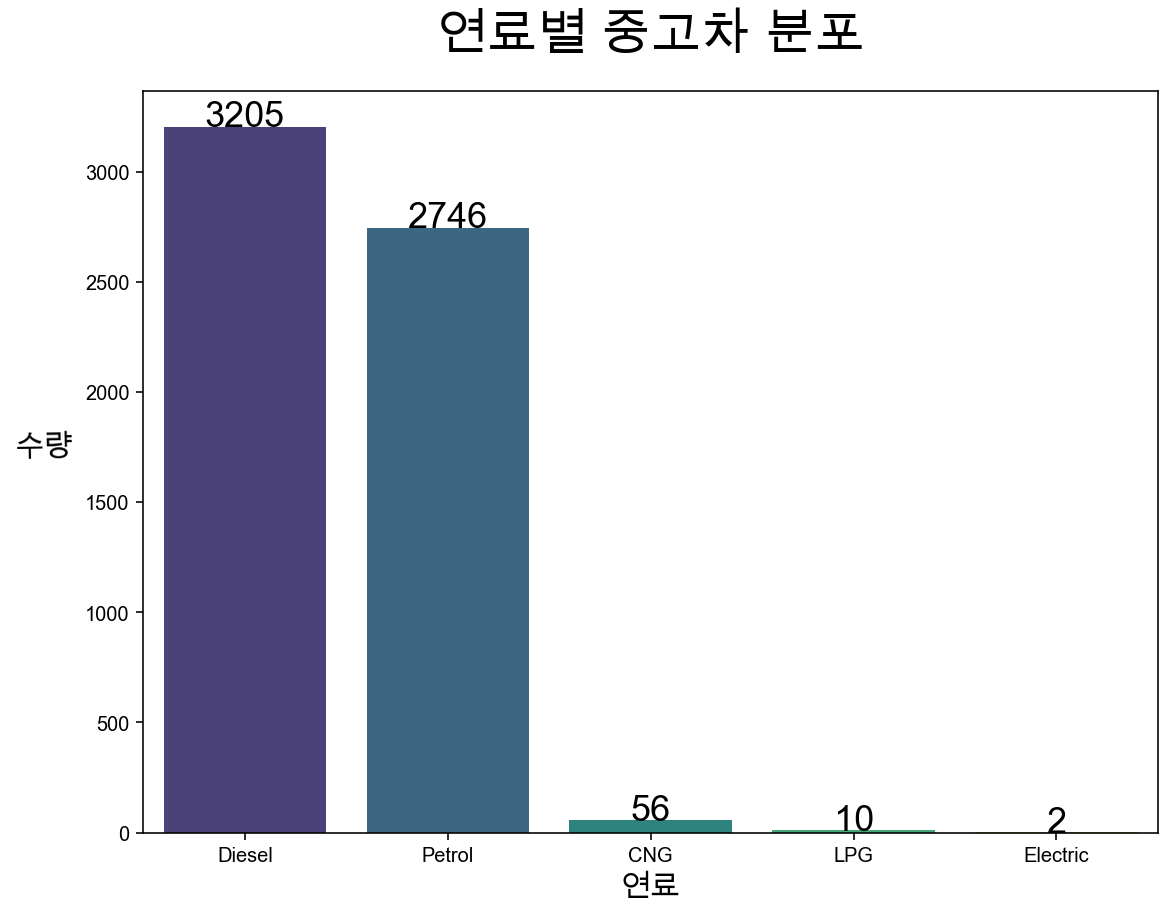

In [7]:
# 연료 분포 그래프
plt.figure(figsize=(20,15))
plt.subplot(221)

g = sns.barplot(data=pd.DataFrame(car_t['Fuel_Type'].value_counts()).T, palette='viridis', ci=False)

plt.title('연료별 중고차 분포', fontsize=25, y=1.04)
plt.xlabel('연료', fontsize=15)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=20)

for i in range(0,5):
    g.text(i,car_t['Fuel_Type'].value_counts()[i], car_t['Fuel_Type'].value_counts()[i], 
    color= 'black', ha='center', fontsize=18)

plt.show()

In [8]:
# Mileage null값 확인
car_t[car_t['Mileage'].isnull()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5,0 Lakh,12.75


In [9]:
# Mileage null값 제거
car_t = car_t.drop([4446, 4904])
car_t.reset_index(drop=True, inplace=True)

In [10]:
# 필요없는 컬럼 제거
car_t.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
# 단위제거 함수
def get_split(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1[i].split(' ')[0])
        
    data[new] = ls2
    print(new)
    
def get_split2(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1.str.split(' ', n=1)[i][1])
        
    data[new] = ls2
    print(new)

In [12]:
get_split(car_t, 'Name', 'Brand')
get_split2(car_t, 'Name', 'Car_name')
get_split(car_t, 'Mileage', 'Mile')
get_split(car_t, 'Engine', 'Eng')
get_split(car_t, 'Power', 'Pow')
get_split(car_t, 'New_Price', 'New_p')

Brand
Car_name
Mile
Eng
Pow
New_p


In [13]:
car_t.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
Car_name             0
Mile                 0
Eng                  0
Pow                  0
New_p                0
dtype: int64

In [14]:
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             6017 non-null   object 
 9   Power              6017 non-null   object 
 10  Seats              6017 non-null   int64  
 11  New_Price          6017 non-null   object 
 12  Price              6017 non-null   float64
 13  Brand              6017 non-null   object 
 14  Car_name           6017 non-null   object 
 15  Mile               6017 non-null   object 
 16  Eng                6017 

In [15]:
# 형변환
car_t[['Mile', 'Eng', 'Pow', 'New_p']] = car_t[['Mile', 'Eng', 'Pow', 'New_p']].astype(float)

In [16]:
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             6017 non-null   object 
 9   Power              6017 non-null   object 
 10  Seats              6017 non-null   int64  
 11  New_Price          6017 non-null   object 
 12  Price              6017 non-null   float64
 13  Brand              6017 non-null   object 
 14  Car_name           6017 non-null   object 
 15  Mile               6017 non-null   float64
 16  Eng                6017 

In [17]:
car_t['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          271
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Lamborghini         1
Smart               1
Ambassador          1
Isuzu               1
Name: Brand, dtype: int64

In [18]:
car_t['Brand'][car_t['Brand'] == 'ISUZU'] = 'Isuzu'

In [19]:
car_t['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          271
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
Isuzu               3
Lamborghini         1
Smart               1
Ambassador          1
Bentley             1
Name: Brand, dtype: int64

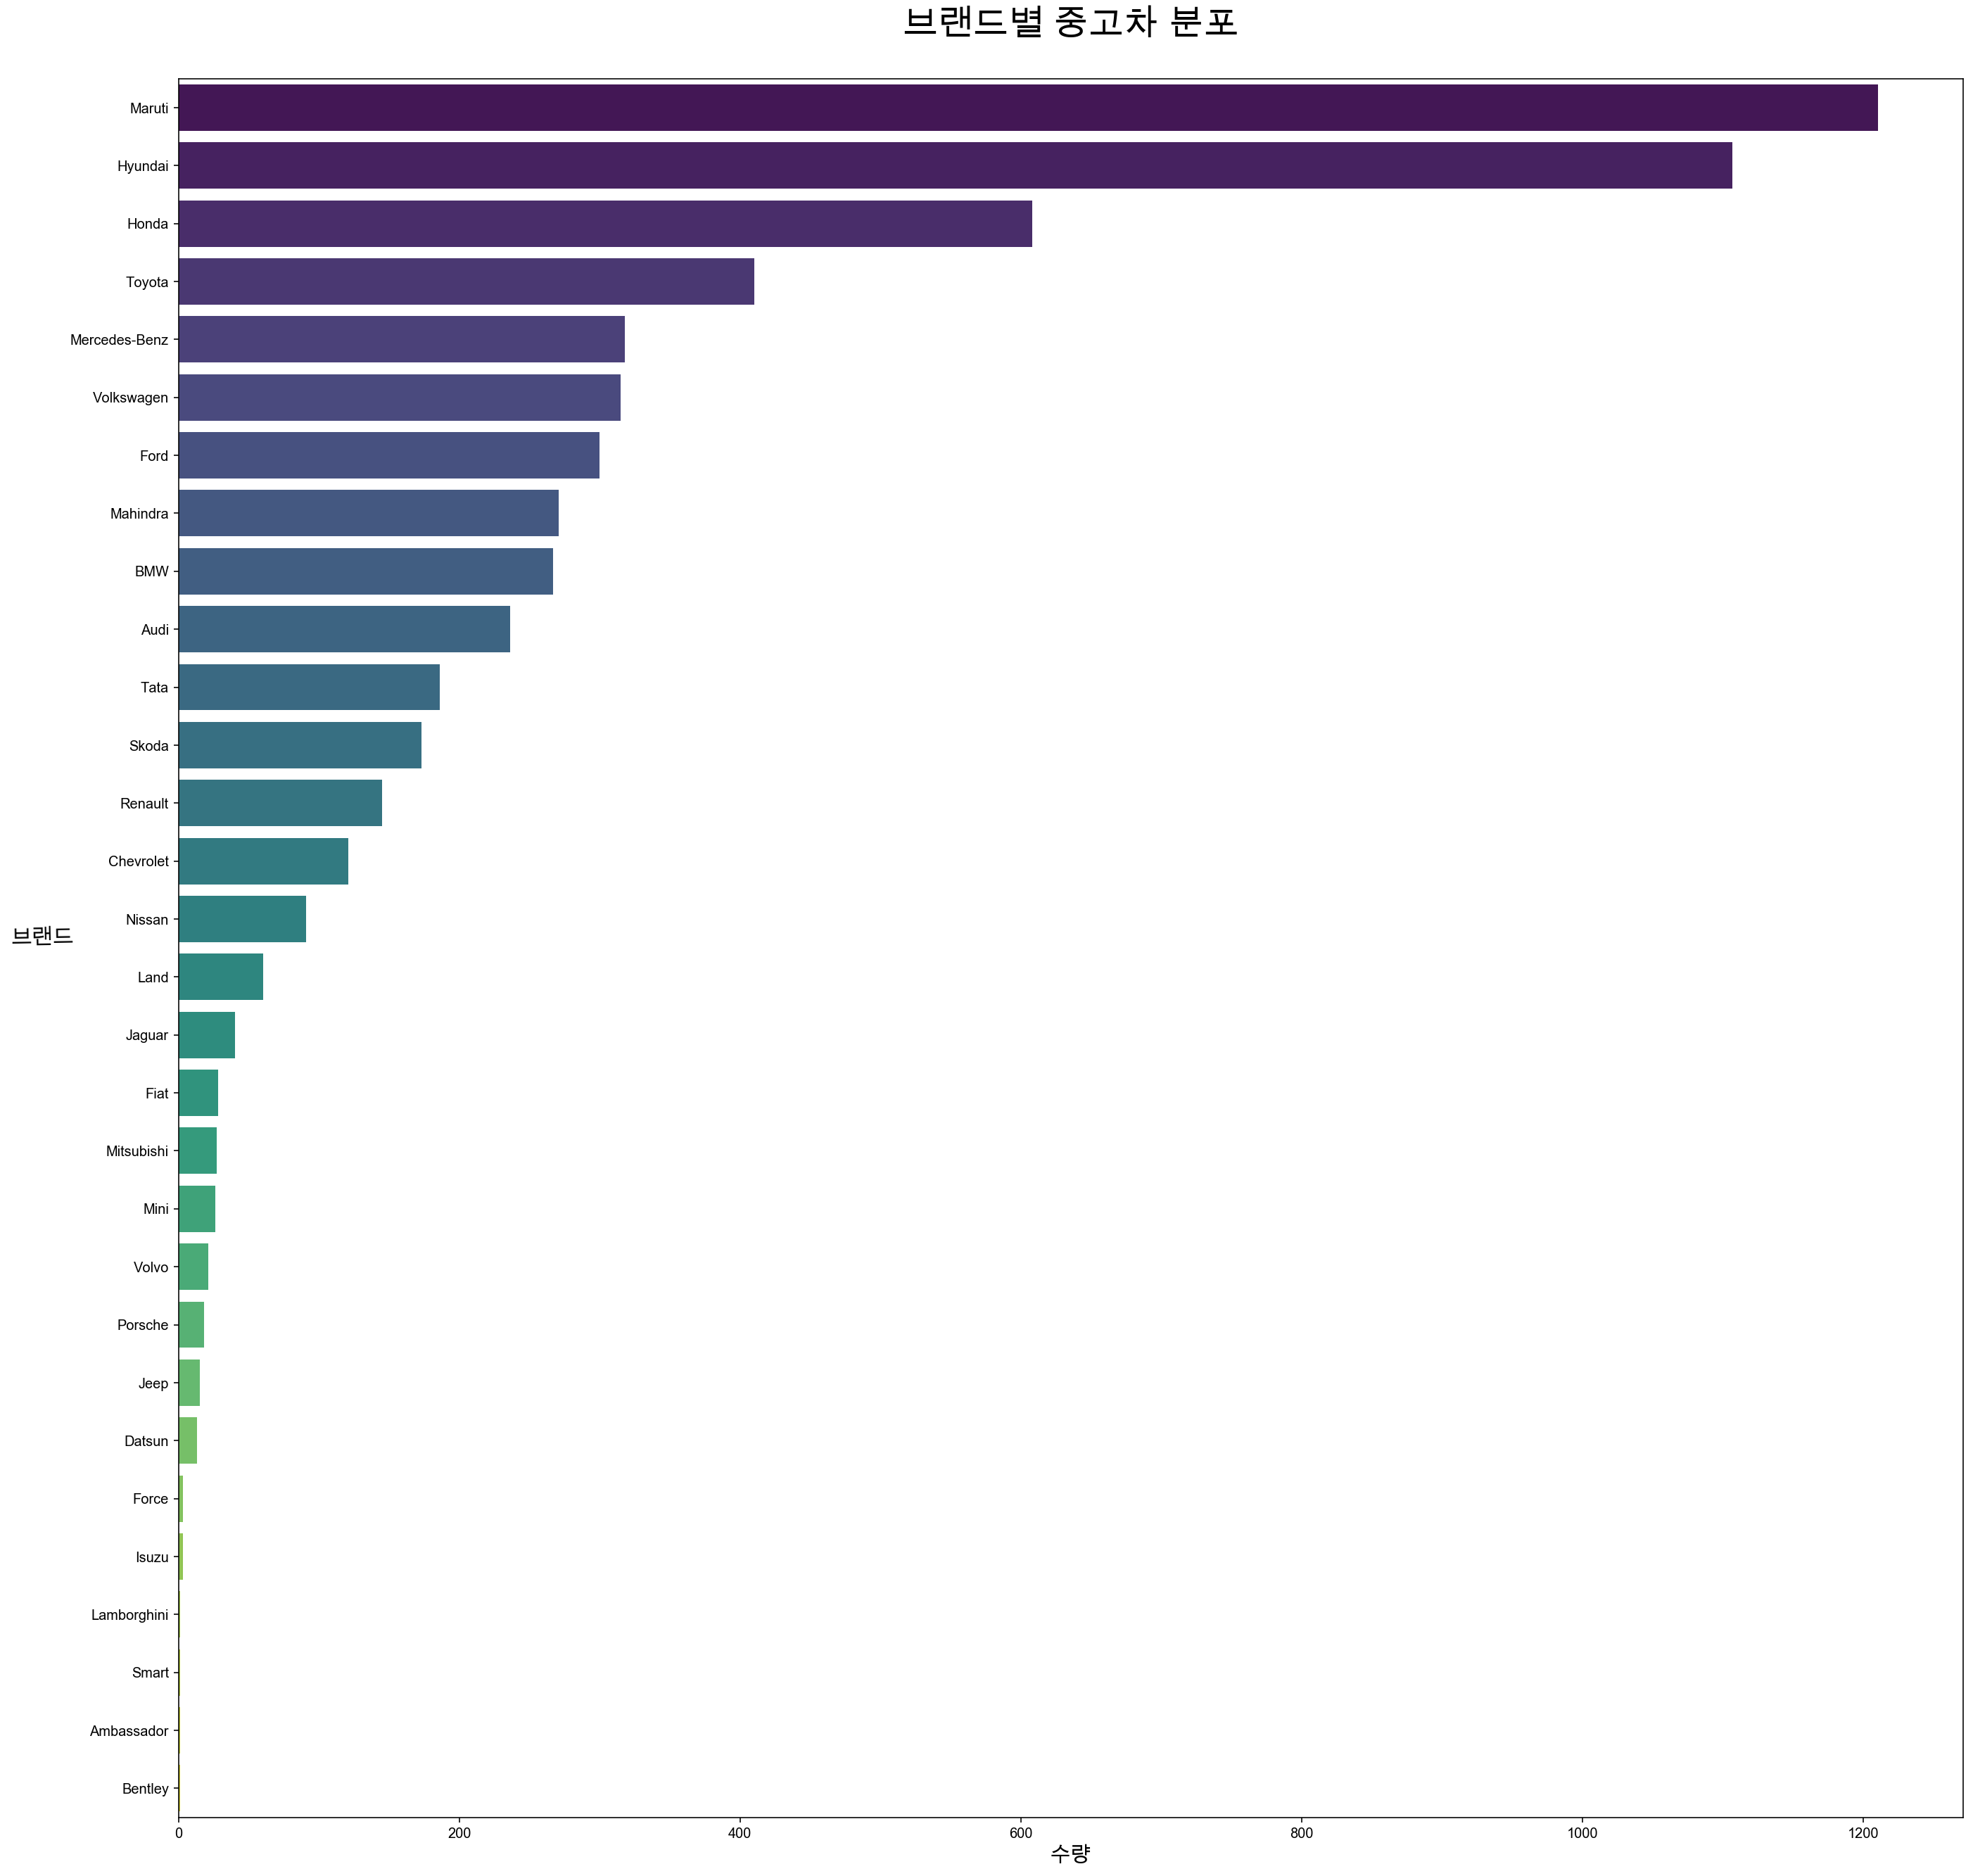

In [20]:
plt.figure(figsize=(50,50))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Brand'].value_counts()).T, palette='viridis', ci=False, orient='h')

plt.title('브랜드별 중고차 분포', fontsize=25, y=1.02)
plt.xlabel('수량', fontsize=15)
plt.ylabel('브랜드', fontsize=15, rotation=1, labelpad=20) 

plt.show()

In [21]:
car_t['Year'].value_counts()

2014    797
2015    744
2016    740
2013    649
2017    587
2012    580
2011    465
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

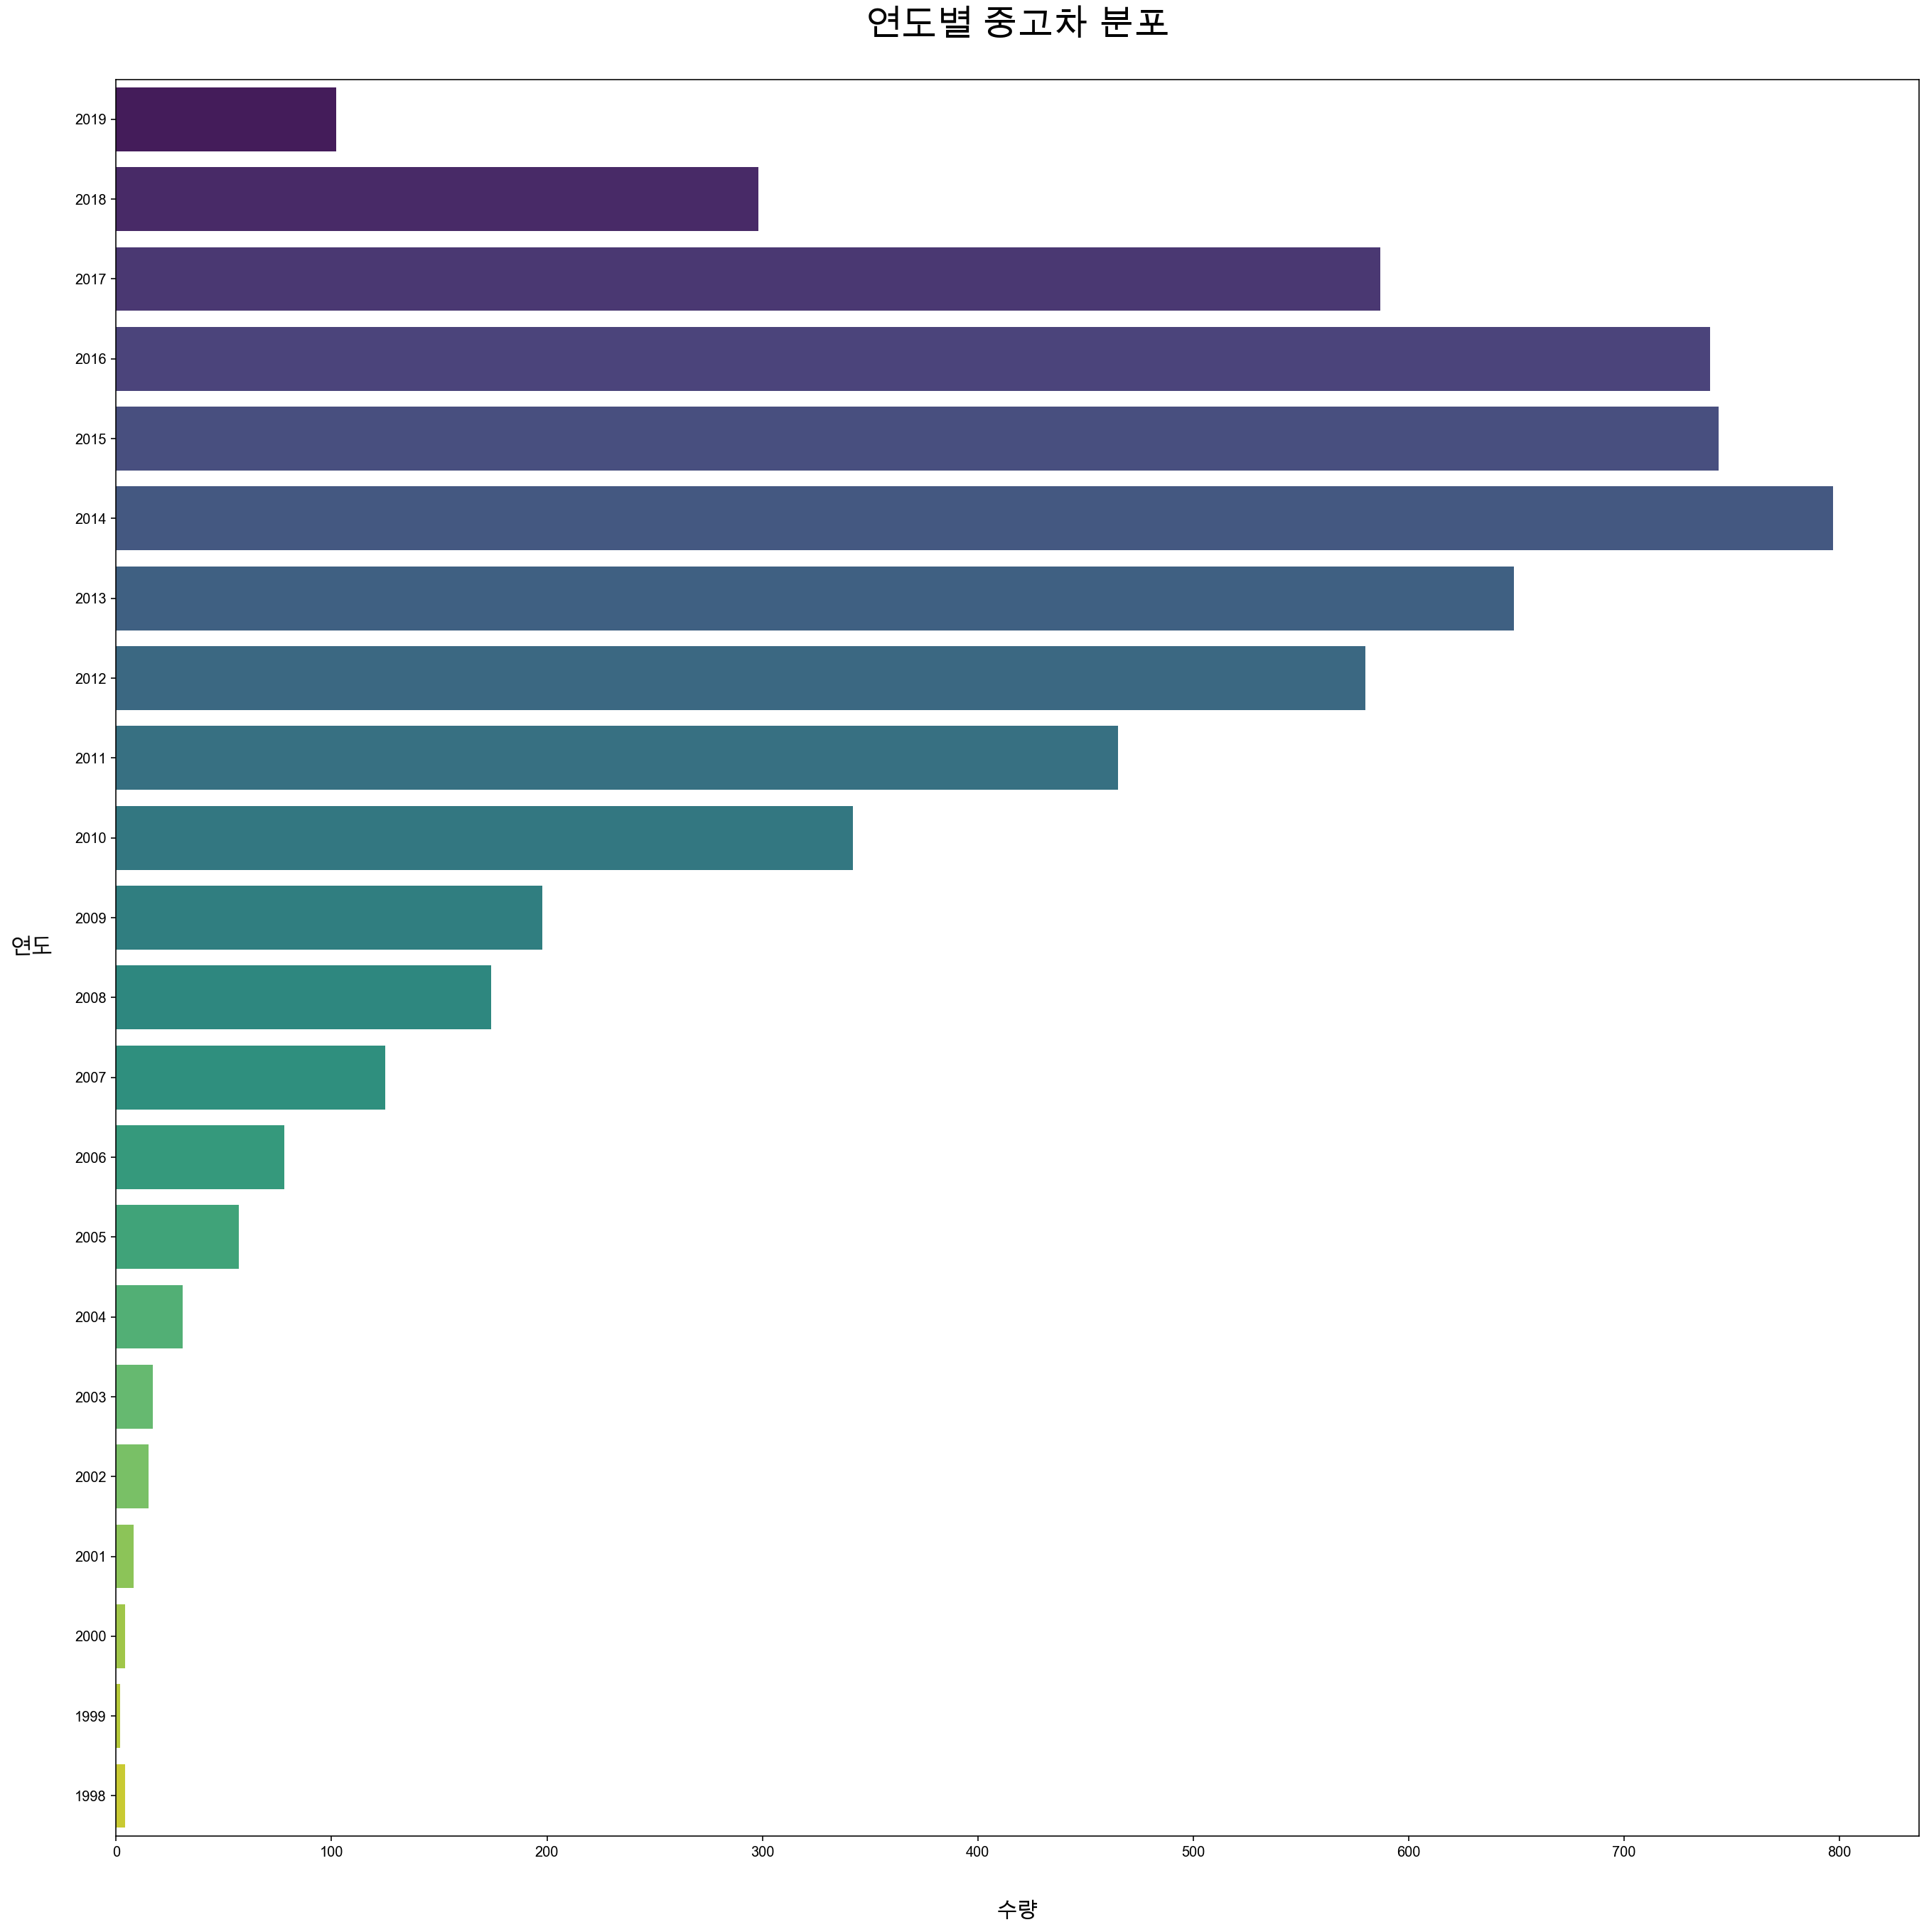

In [22]:
# 연도별 분포 그래프
plt.figure(figsize=(50,50))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Year'].value_counts()).sort_index(ascending=False).T, palette='viridis', ci=False, orient='h')

plt.title('연도별 중고차 분포', fontsize=25, y=1.02)
plt.xlabel('수량', fontsize=15, labelpad=30)
plt.ylabel('연도', fontsize=15, rotation=1, labelpad=30) 

plt.show()

In [23]:
car_t['Location'].value_counts()

Mumbai        789
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       493
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

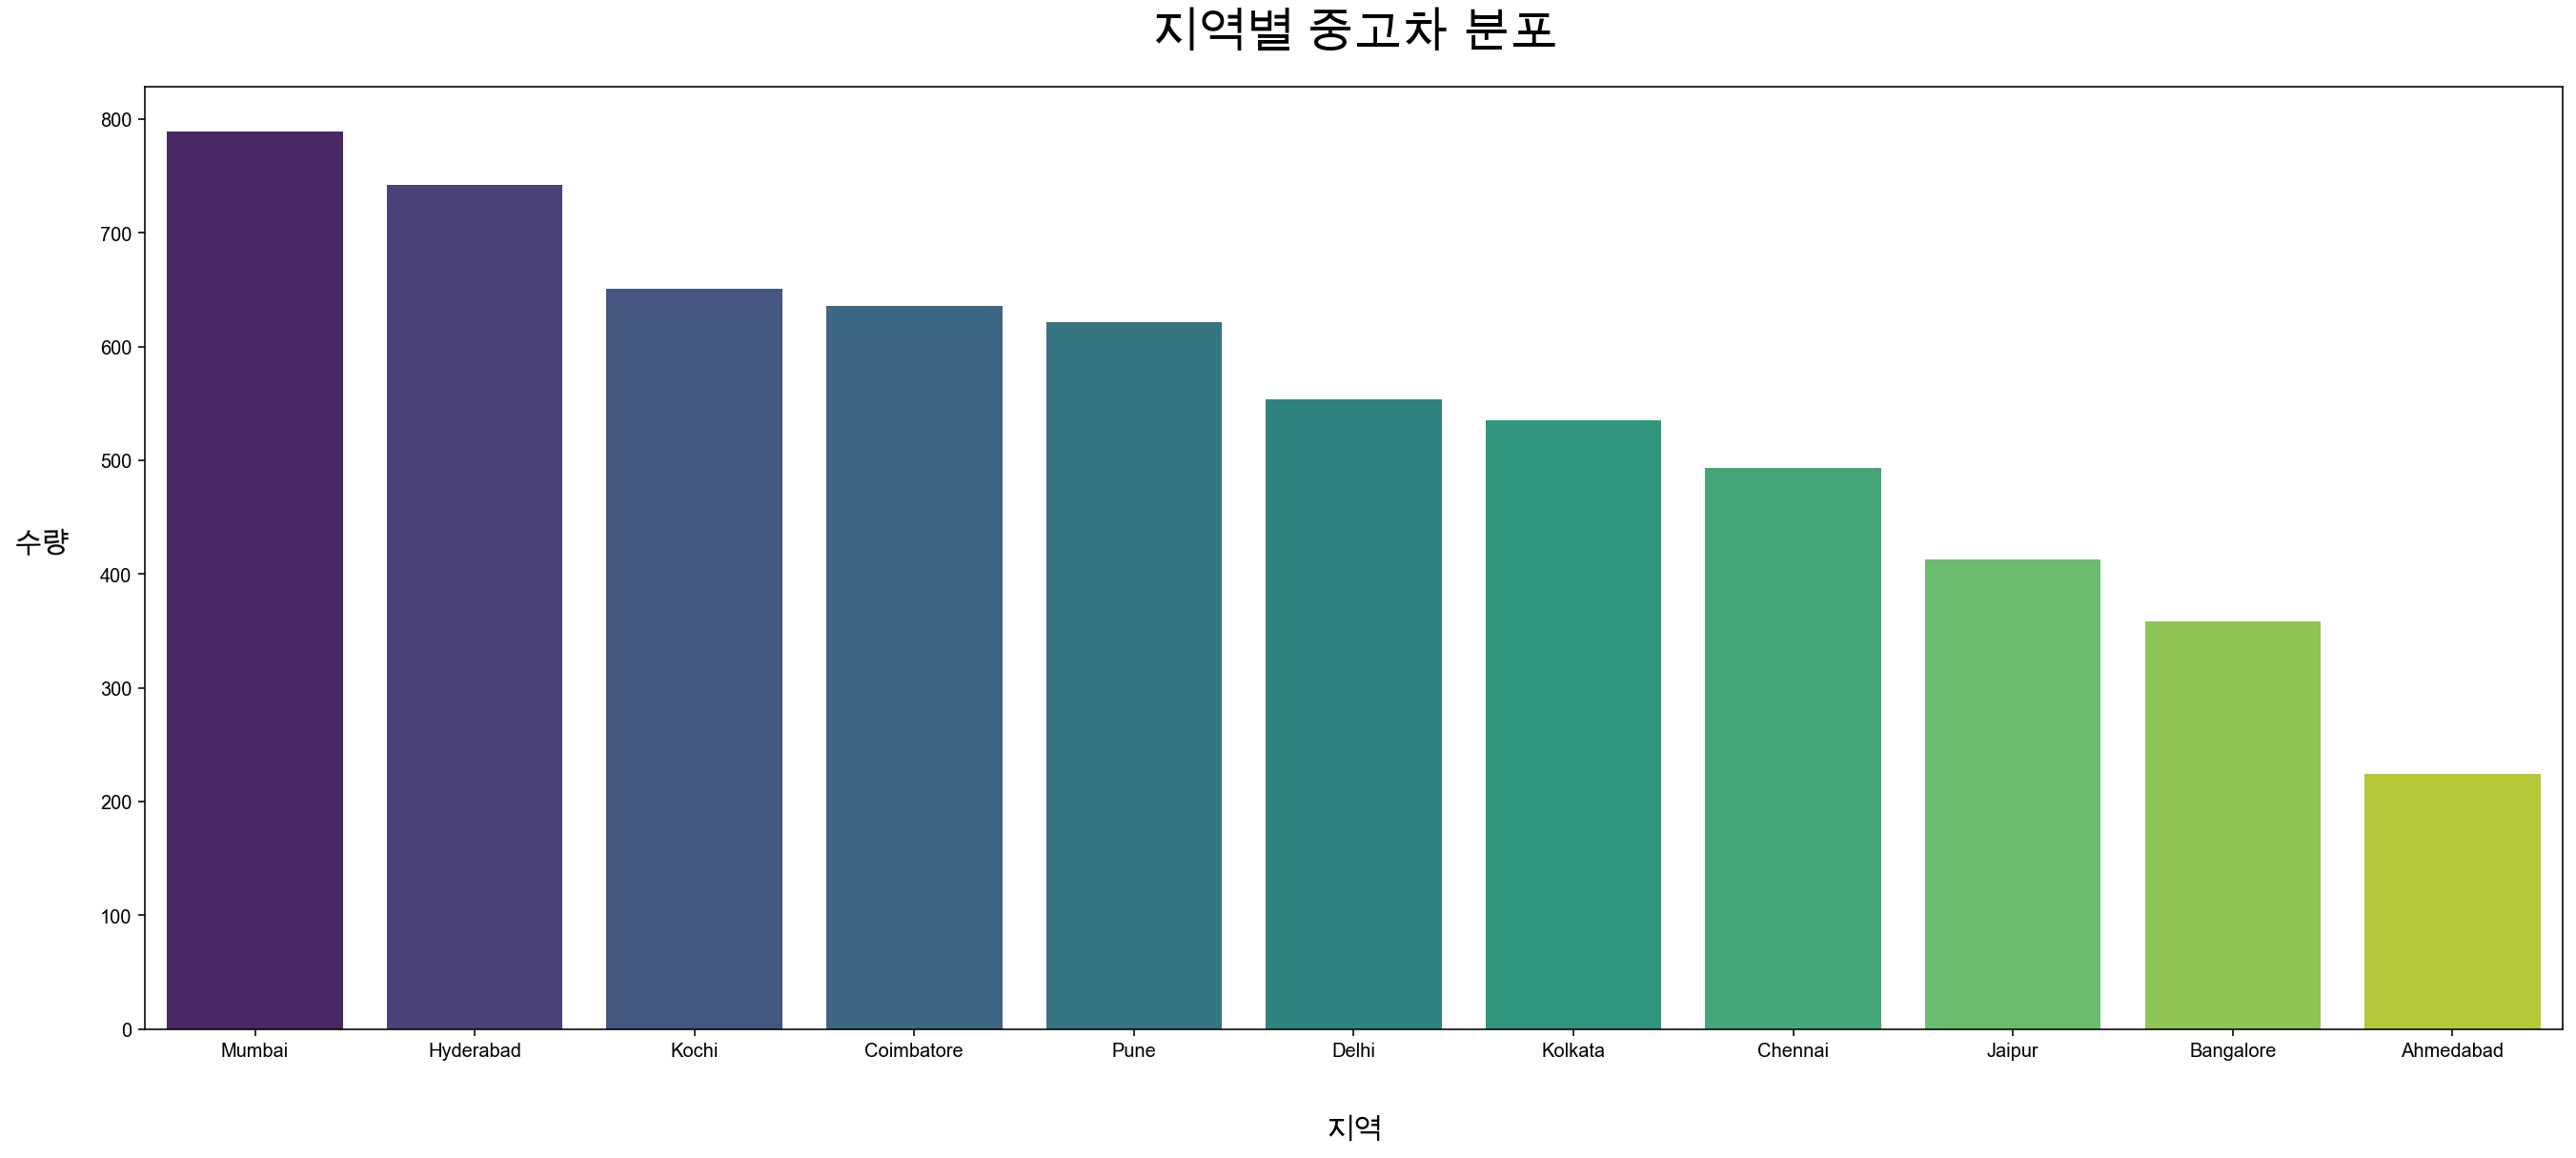

In [24]:
# 지역별 분포 그래프
plt.figure(figsize=(50,20))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Location'].value_counts()).sort_values(by='Location', ascending=False).T, palette='viridis', ci=False)

plt.title('지역별 중고차 분포', fontsize=25, y=1.03)
plt.xlabel('지역', fontsize=15, labelpad=30)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30) 

plt.show()

In [25]:
car_t['Transmission'].value_counts()

Manual       4299
Automatic    1718
Name: Transmission, dtype: int64

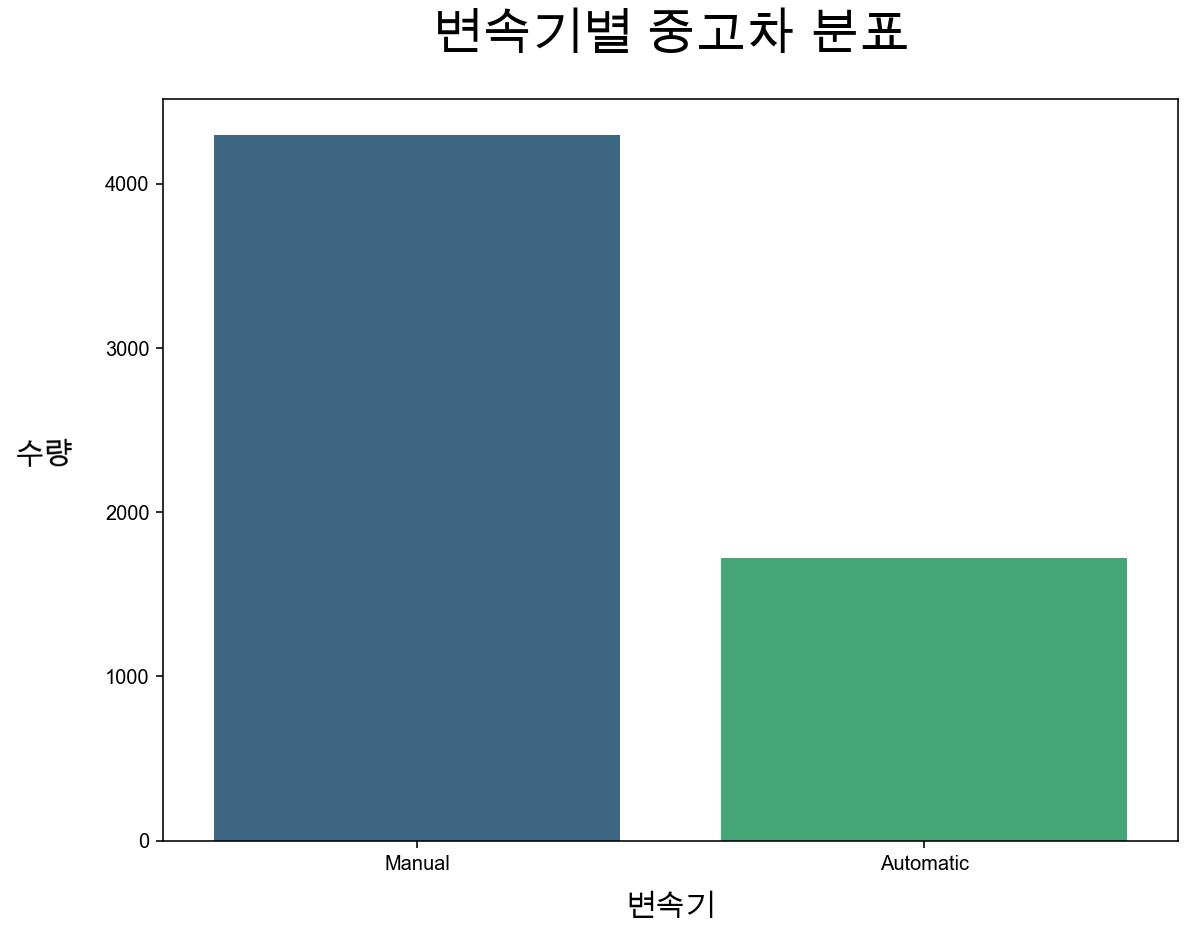

In [26]:
plt.figure(figsize=(20,15))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Transmission'].value_counts()).sort_index(ascending=False).T, palette='viridis', ci=False)

plt.title('변속기별 중고차 분표', fontsize=25, y=1.05)
plt.xlabel('변속기', fontsize=15, labelpad=10)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30) 

plt.show()

In [27]:
car_t['Owner_Type'].value_counts()

First             4927
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

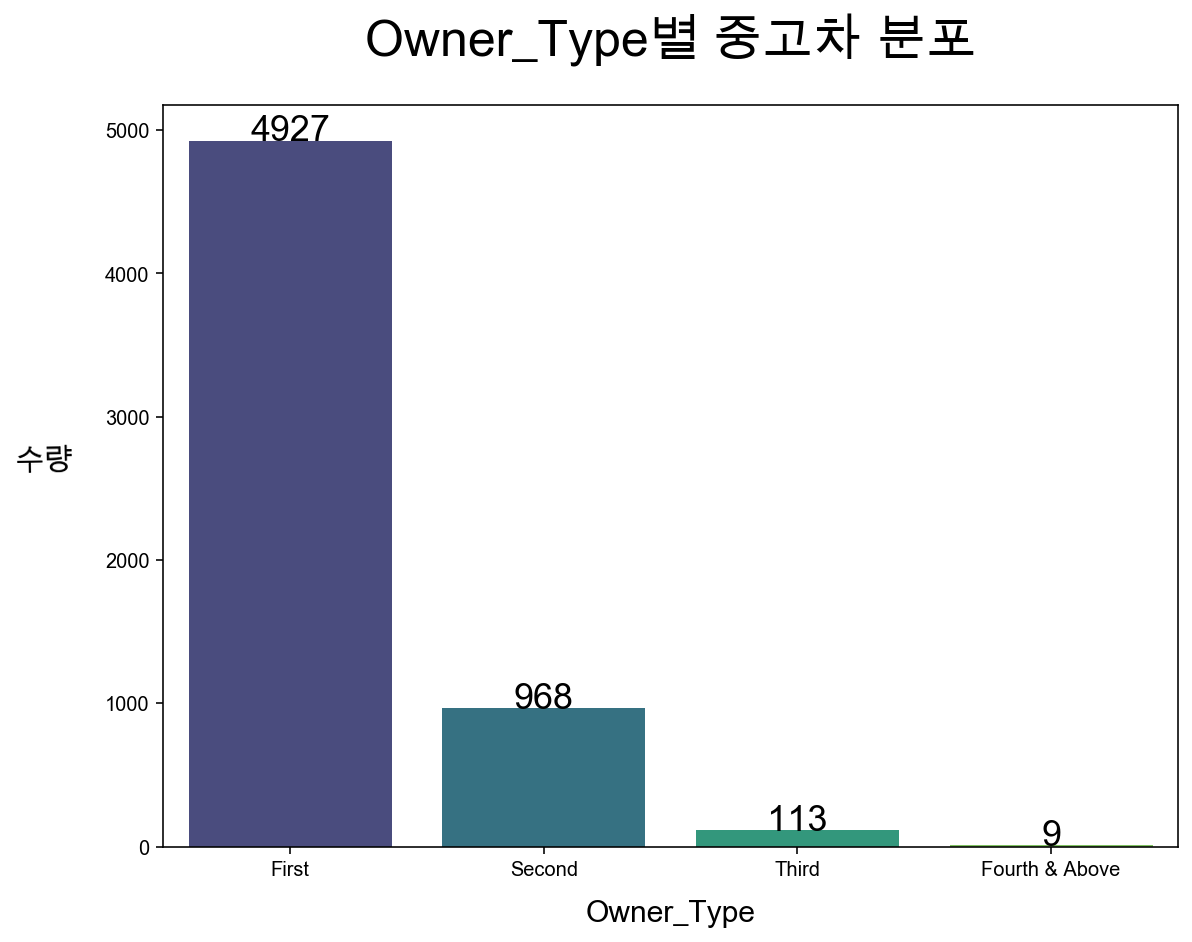

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(221)

g = sns.barplot(data=pd.DataFrame(car_t['Owner_Type'].value_counts()).sort_values(by='Owner_Type', ascending=False).T, palette='viridis', ci=False)

plt.title('Owner_Type별 중고차 분포', fontsize=25, y=1.05)
plt.xlabel('Owner_Type', fontsize=15, labelpad=10)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30) 

for i in range(0,4):
    g.text(i,car_t['Owner_Type'].value_counts()[i], car_t['Owner_Type'].value_counts()[i], 
    color= 'black', ha='center', fontsize=18)

plt.show()

In [29]:
car_t['Fuel_Type'].value_counts()

Diesel    3205
Petrol    2746
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

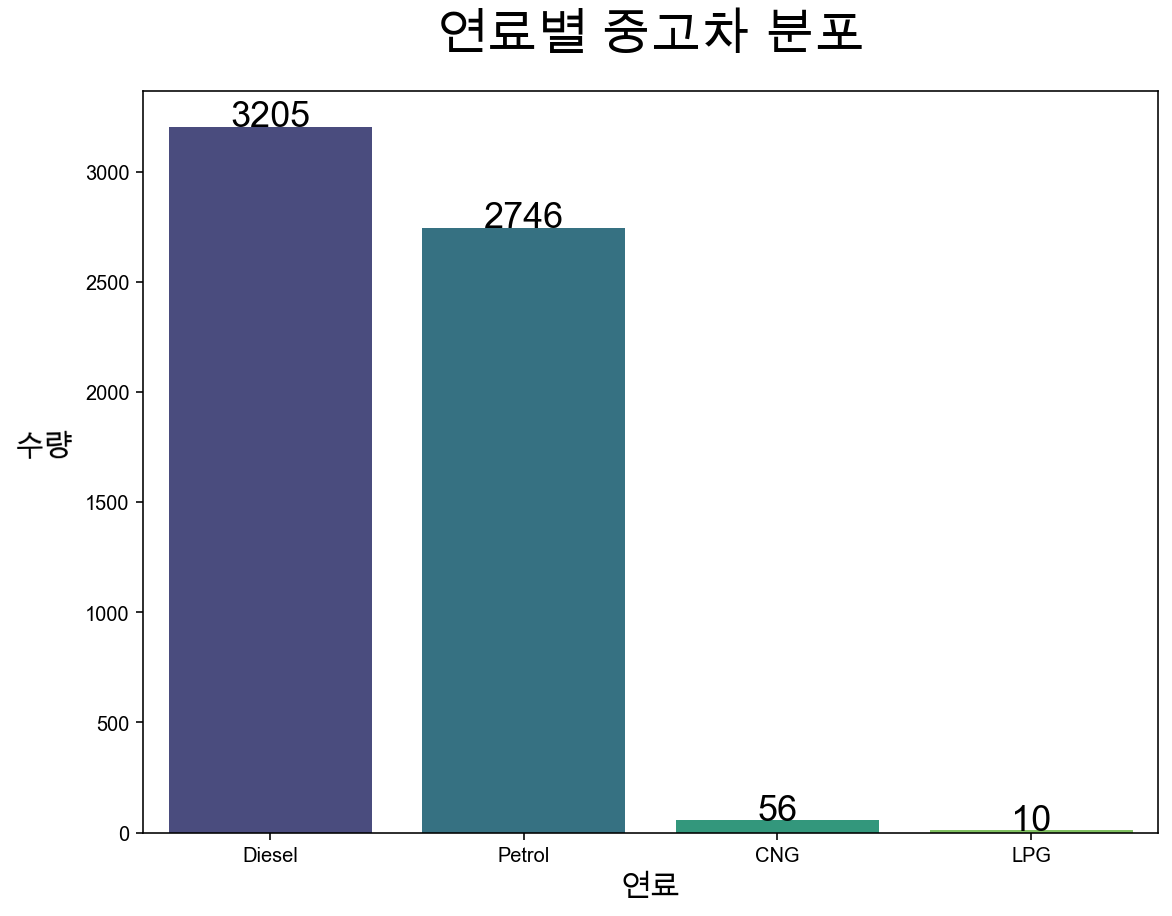

In [30]:
# 연료 분포 그래프
plt.figure(figsize=(20,15))
plt.subplot(221)

g = sns.barplot(data=pd.DataFrame(car_t['Fuel_Type'].value_counts()).T, palette='viridis', ci=False)

plt.title('연료별 중고차 분포', fontsize=25, y=1.04)
plt.xlabel('연료', fontsize=15)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=20)

for i in range(0,4):
    g.text(i,car_t['Fuel_Type'].value_counts()[i], car_t['Fuel_Type'].value_counts()[i], 
    color= 'black', ha='center', fontsize=18)

plt.show()

In [31]:
# 각 Fuel_type을 km/L로 계산
car_t['Mile'][car_t['Fuel_Type'] == 'CNG']= car_t[car_t['Fuel_Type'] == 'CNG']['Mile']*1.64
car_t['Mile'][car_t['Fuel_Type'] == 'LPG']= car_t[car_t['Fuel_Type'] == 'LPG']['Mile']*1.3

In [32]:
car_td = pd.get_dummies(car_t, columns=['Location', 'Fuel_Type', 'Transmission', 'Brand'])
car_td.head(1)

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_name,Mile,Eng,Pow,New_p,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,Maruti Wagon R LXI CNG,2010,72000,First,26.6 km/kg,998 CC,58.16 bhp,5,0 Lakh,1.75,Wagon R LXI CNG,43.624,998.0,58.16,0.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# Owner를 1234로 변환
car_td['Owner'] = range(0,len(car_td))

for i in range(0,len(car_td)):
    if car_td['Owner_Type'][i] == 'First':
        car_td['Owner'][i] = 1

    elif car_td['Owner_Type'][i] == 'Second':
        car_td['Owner'][i] = 2

    elif car_td['Owner_Type'][i] == 'Third':
        car_td['Owner'][i] = 3

    elif car_td['Owner_Type'][i] == 'Fourth & Above':
        car_td['Owner'][i] = 4

In [34]:
car_td.head(1)

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_name,Mile,Eng,Pow,New_p,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner
0,Maruti Wagon R LXI CNG,2010,72000,First,26.6 km/kg,998 CC,58.16 bhp,5,0 Lakh,1.75,Wagon R LXI CNG,43.624,998.0,58.16,0.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
# 중복컬럼제거
car_td.drop(['Name', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price'], axis=1, inplace=True)

In [36]:
car_td.head(1)

,Year,Kilometers_Driven,Seats,Price,Car_name,Mile,Eng,Pow,New_p,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner
0,2010,72000,5,1.75,Wagon R LXI CNG,43.624,998.0,58.16,0.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
car_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6017 non-null   int64  
 1   Kilometers_Driven       6017 non-null   int64  
 2   Seats                   6017 non-null   int64  
 3   Price                   6017 non-null   float64
 4   Car_name                6017 non-null   object 
 5   Mile                    6017 non-null   float64
 6   Eng                     6017 non-null   float64
 7   Pow                     6017 non-null   float64
 8   New_p                   6017 non-null   float64
 9   Location_Ahmedabad      6017 non-null   uint8  
 10  Location_Bangalore      6017 non-null   uint8  
 11  Location_Chennai        6017 non-null   uint8  
 12  Location_Coimbatore     6017 non-null   uint8  
 13  Location_Delhi          6017 non-null   uint8  
 14  Location_Hyderabad      6017 non-null   

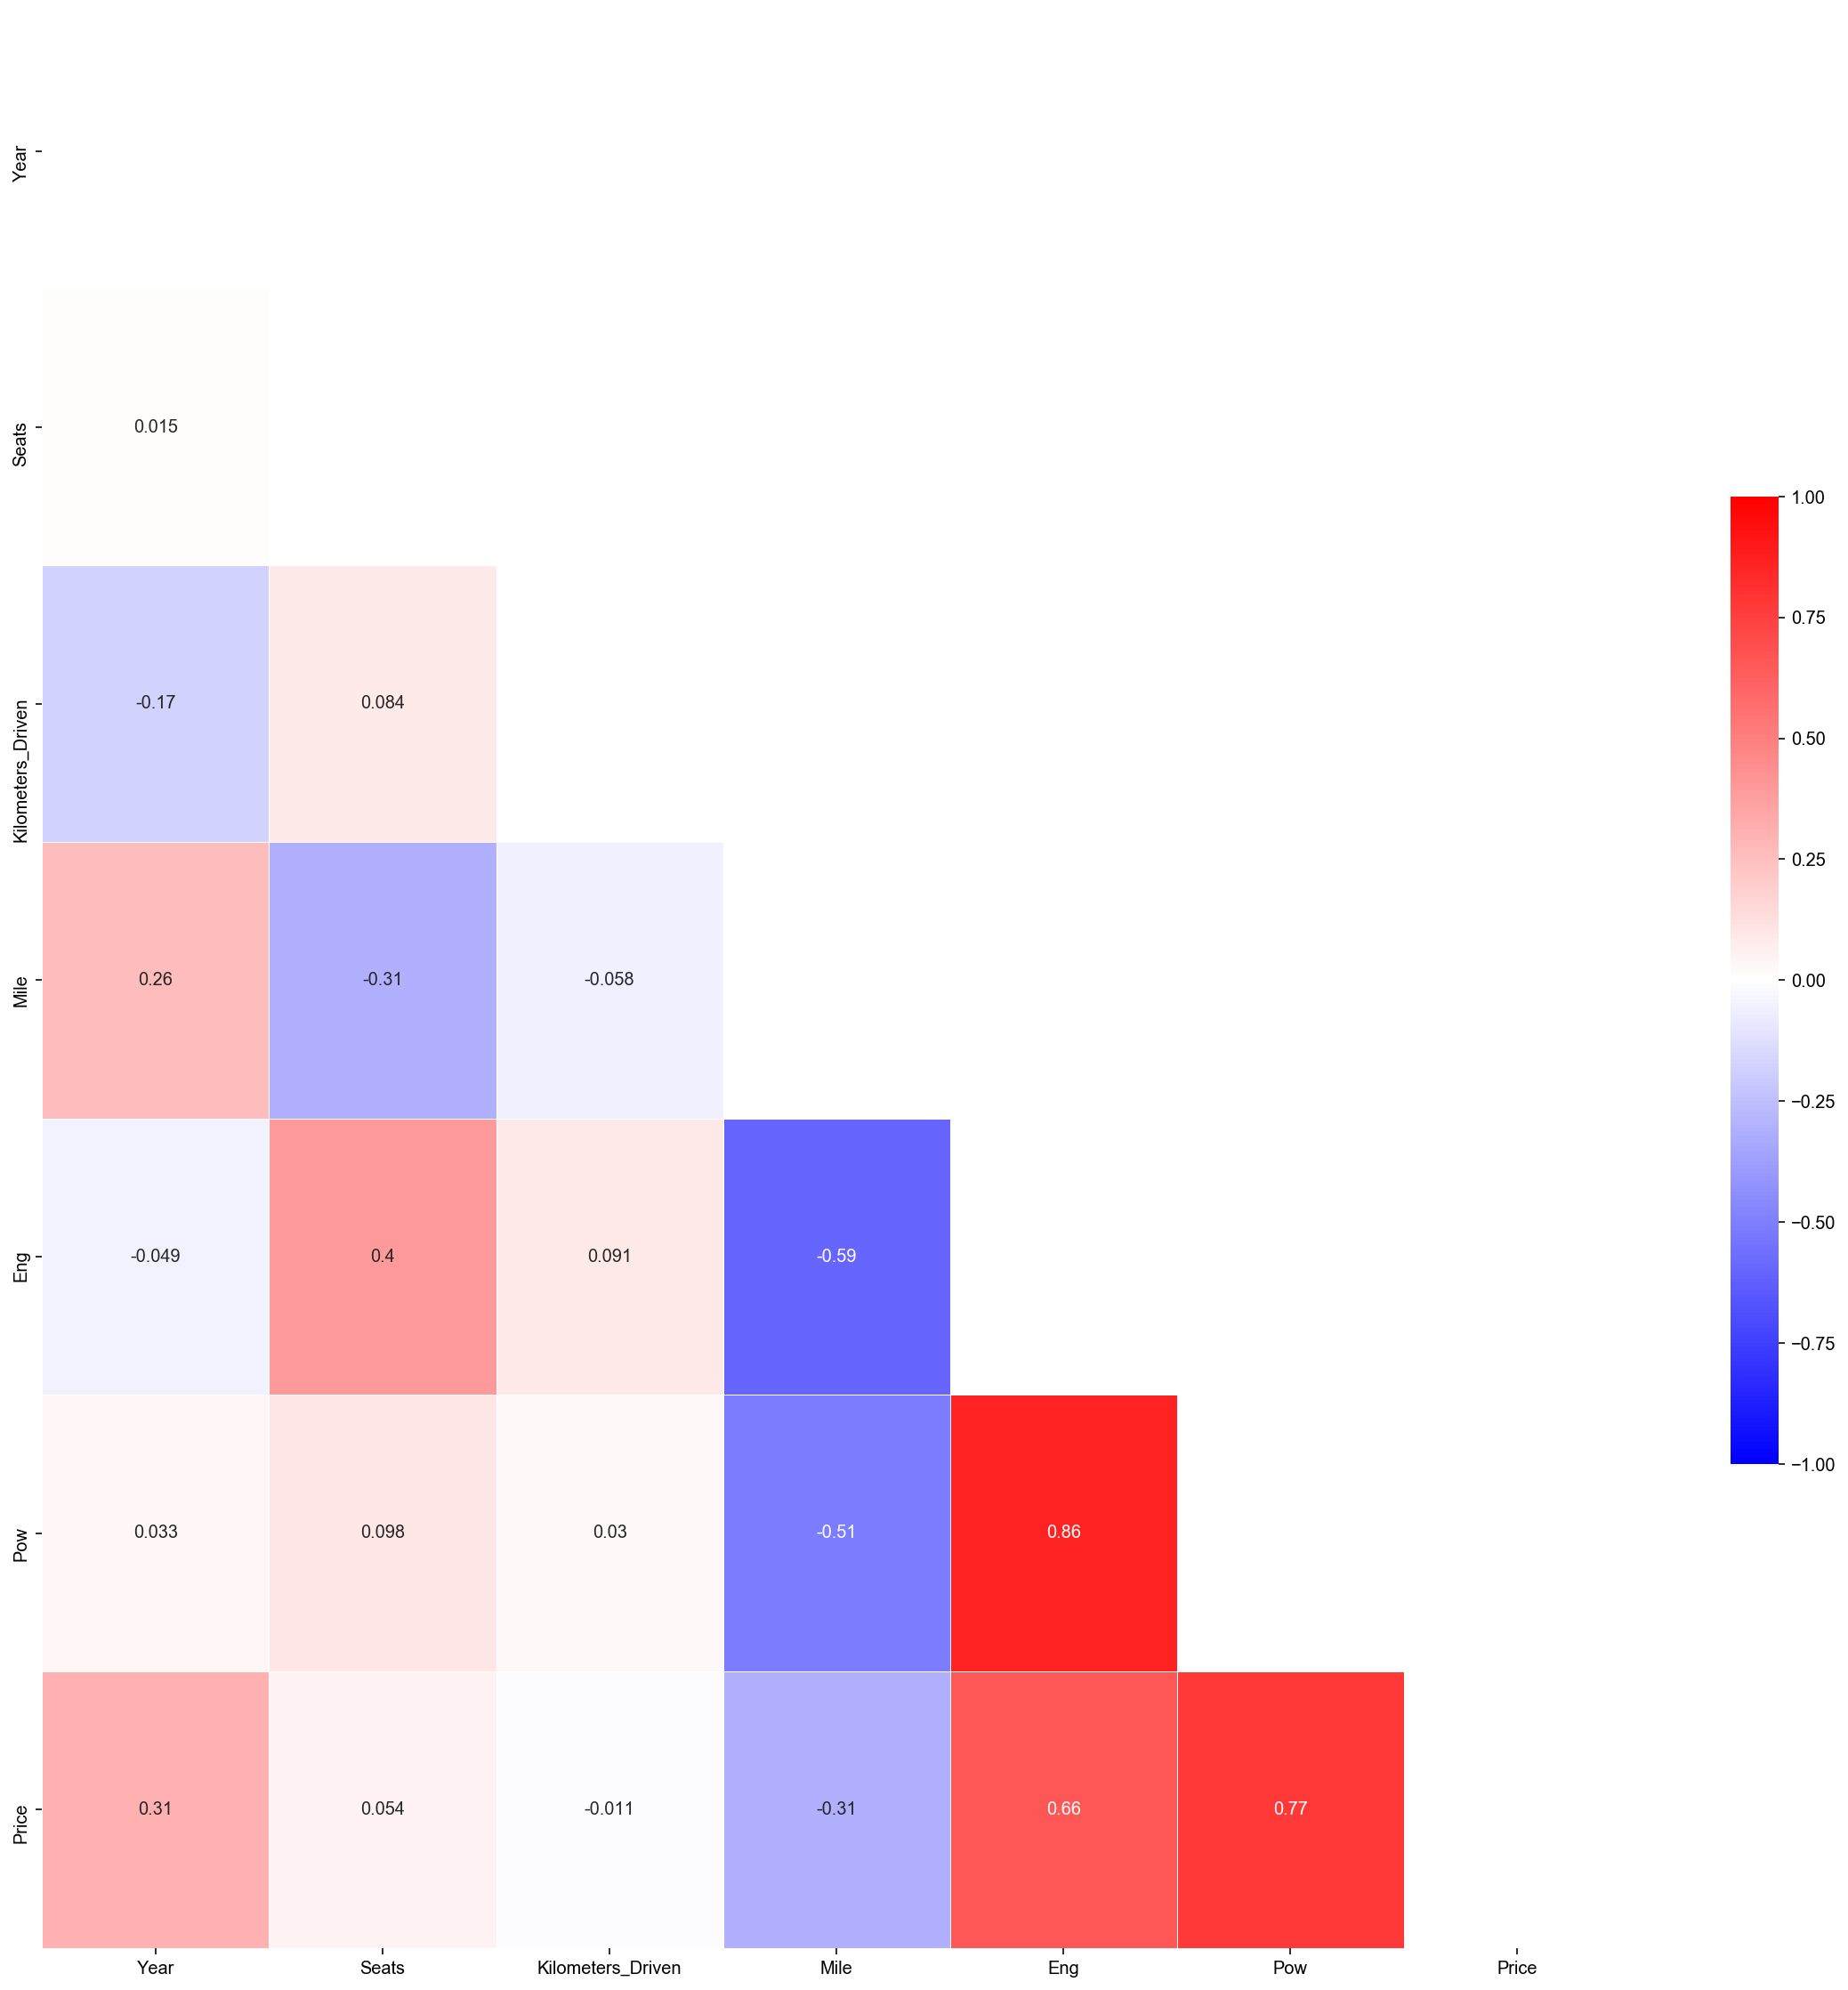

In [38]:
# 주요 변수들로 히트맵
df = car_td[['Year', 'Seats', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Price']].corr()

fig, ax = plt.subplots(figsize=(20,20))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

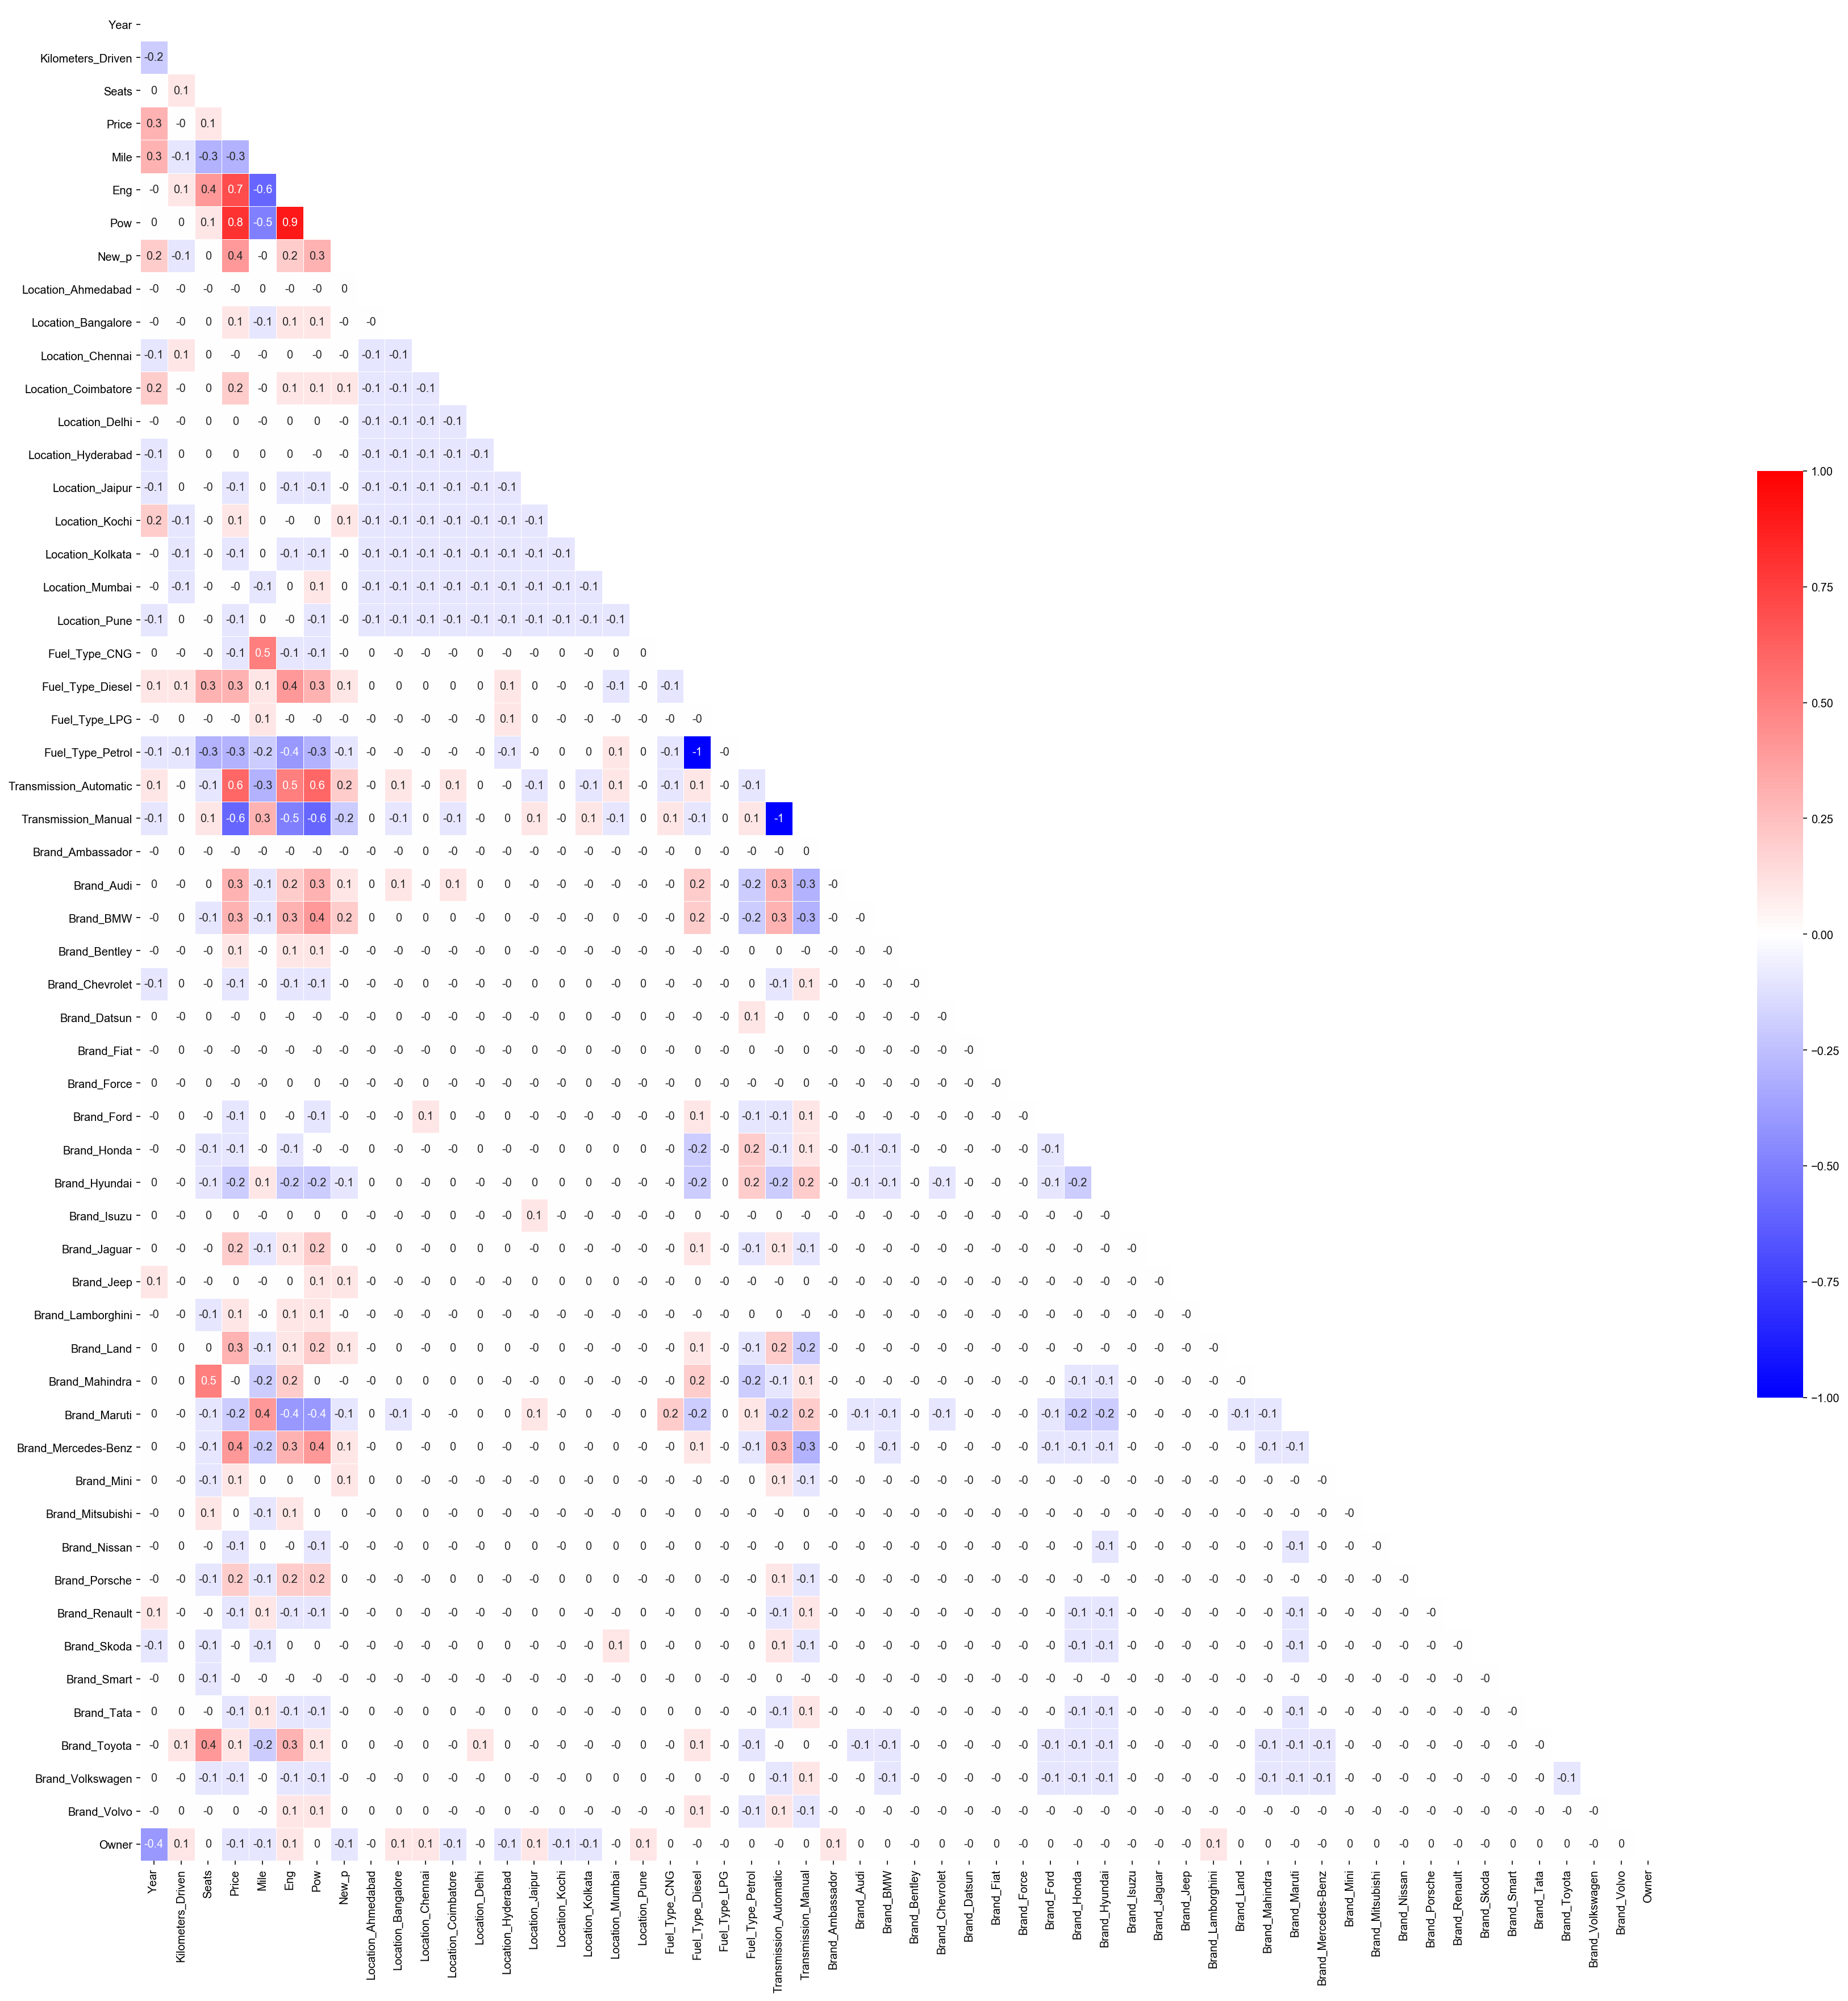

In [39]:
# 모든 컬럼을 변수로 히트맵
df = car_td.corr().round(1)

fig, ax = plt.subplots(figsize=(30,30))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

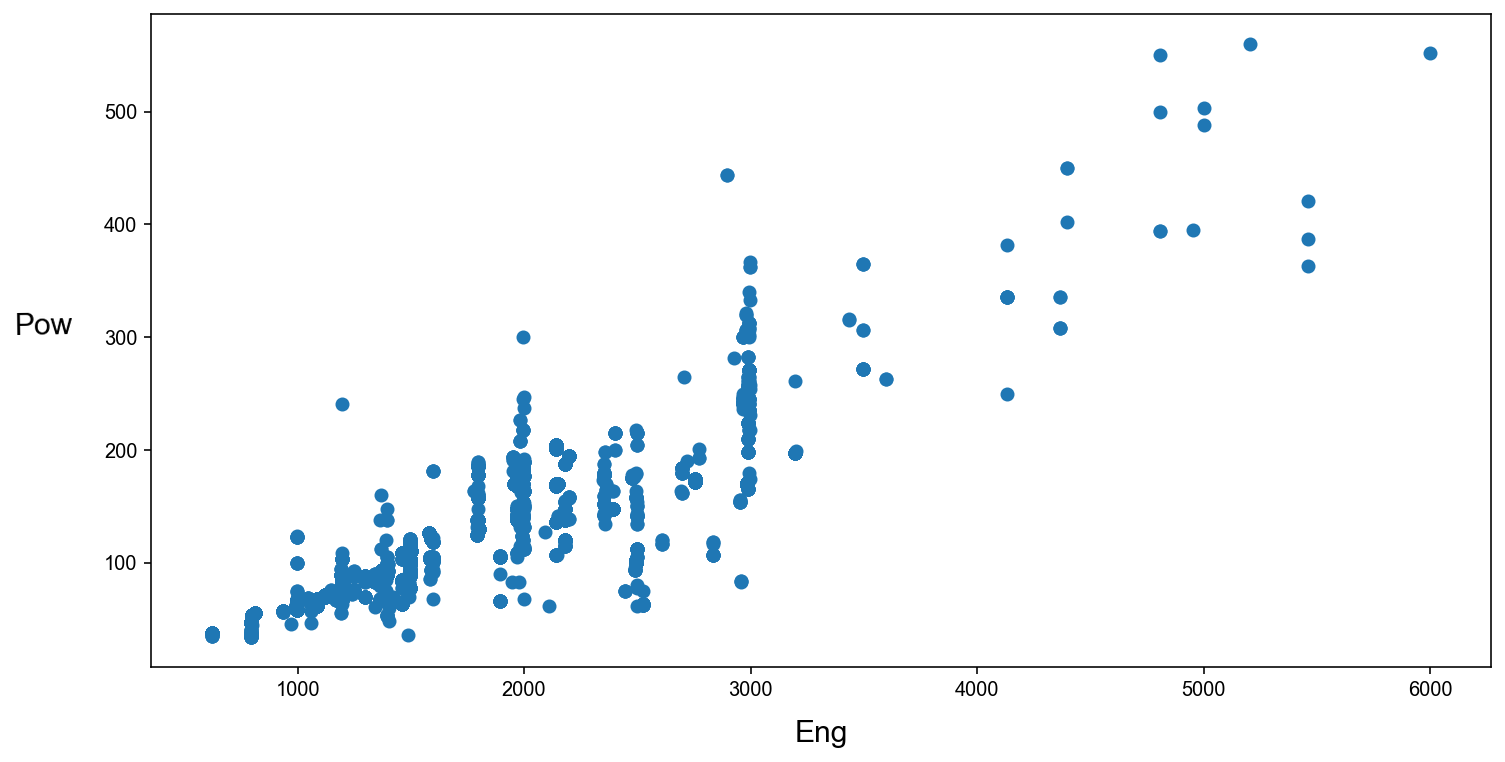

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(x=car_td['Eng'], y=car_td['Pow'])

plt.xlabel('Eng', fontsize=15, labelpad=10)
plt.ylabel('Pow', fontsize=15, rotation=1, labelpad=30) 
plt.show()

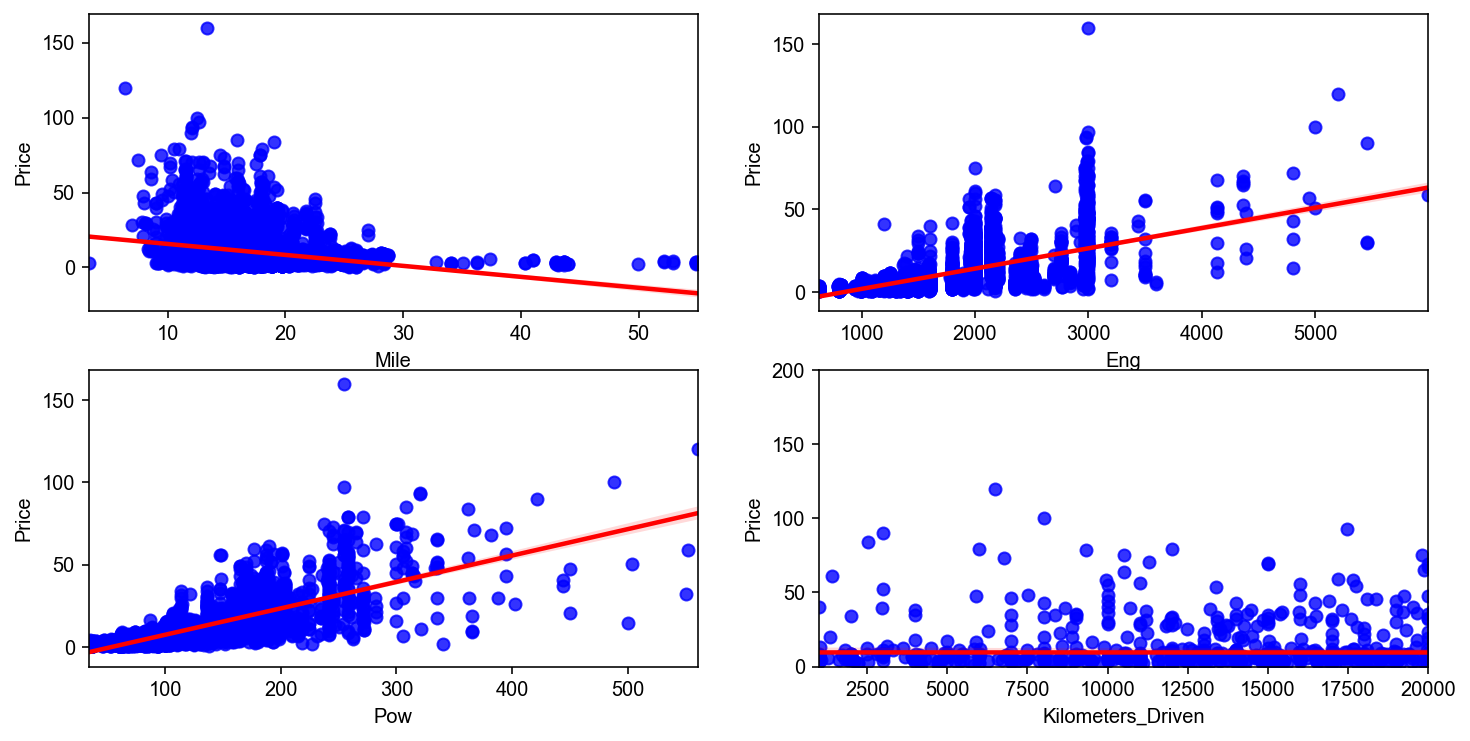

In [41]:
# 주요변수로 regplot
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.regplot(x="Mile", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(222)
sns.regplot(x="Eng", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(223)
sns.regplot(x="Pow", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(224)
sns.regplot(x="Kilometers_Driven", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.axis([1000, 20000, 0, 200])
plt.show()

### 모델

In [42]:
# linear 모델 결과 확인
def get_results(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

    reg = LinearRegression()
    reg.fit(x_train, y_train)

    pred_test = reg.predict(x_test)

    print('explained_variance_score: {}'.format(explained_variance_score(pred_test, y_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(pred_test, y_test)))
    print('r2_score: {}'.format(r2_score(pred_test, y_test)))

### 1. new_price가 있는 데이터

In [43]:
car_td_new = car_td[car_td['New_p'] != 0]

In [44]:
car_td_new.reset_index(drop=True, inplace=True)

In [45]:
car_td_new.head(2)

,Year,Kilometers_Driven,Seats,Price,Car_name,Mile,Eng,Pow,New_p,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner
0,2011,46000,5,4.5,Jazz V,18.20,1199.0,88.7,8.61,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2016,36000,8,17.5,Innova Crysta 2.8 GX AT 8S,11.36,2755.0,171.5,21.00,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [46]:
x = car_td_new.drop(['Car_name','Price'],axis=1)
y = car_td_new['Price']

In [47]:
get_results(x,y)

explained_variance_score: 0.7385824568644246
mean_squared_errors: 46.25730641307088
r2_score: 0.7374373016367413


### 2. new_price가 없는 데이터
- 823개 무작위 추출 후 MSE확인
- new_price의 중요성 확인

In [48]:
def get_results2(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

    reg = LinearRegression()
    reg.fit(x_train, y_train)

    pred_test = reg.predict(x_test)

    
    return(mean_squared_error(pred_test, y_test))

In [49]:
# ls_1000 = []

# for _ in range(0,10000):
#     car_8s = car_td[car_td['New_p'] == 0].sample(n=823)

#     car_8s.reset_index(drop=True, inplace=True)

#     x = car_8s.drop(['Car_name','Price'], axis=1)
#     y = car_8s['Price']

#     ls_1000.append(get_results2(x, y))

# ls_1000_pd = pd.DataFrame(ls_1000)

# len(ls_1000_pd[ls_1000_pd[0]>=46])/10000*100

### 결과
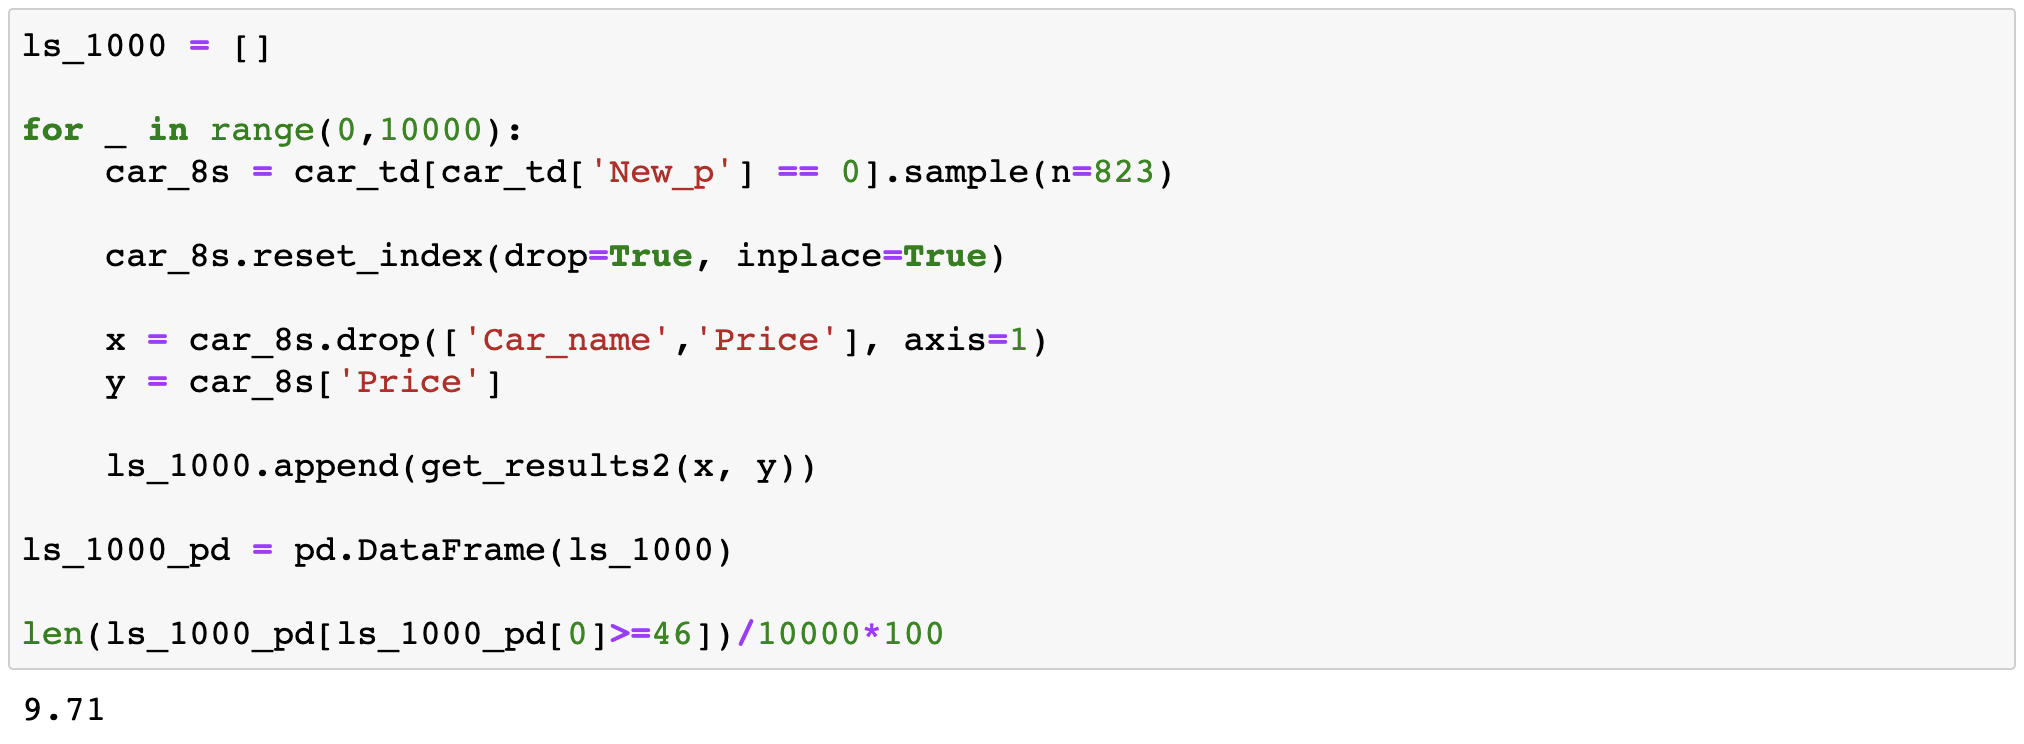

- 9.71%만이 New_price가 있을 때 MSE가 낮게 나왔다
- 중요도가 낮다고 판단
- 모델의 정확도를 높이위해 컬럼 삭제

In [50]:
car_td = car_td.drop(['New_p'], axis=1)

In [51]:
car_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6017 non-null   int64  
 1   Kilometers_Driven       6017 non-null   int64  
 2   Seats                   6017 non-null   int64  
 3   Price                   6017 non-null   float64
 4   Car_name                6017 non-null   object 
 5   Mile                    6017 non-null   float64
 6   Eng                     6017 non-null   float64
 7   Pow                     6017 non-null   float64
 8   Location_Ahmedabad      6017 non-null   uint8  
 9   Location_Bangalore      6017 non-null   uint8  
 10  Location_Chennai        6017 non-null   uint8  
 11  Location_Coimbatore     6017 non-null   uint8  
 12  Location_Delhi          6017 non-null   uint8  
 13  Location_Hyderabad      6017 non-null   uint8  
 14  Location_Jaipur         6017 non-null   

In [52]:
x = car_td.drop(['Car_name', 'Price'], axis=1)
y = car_td['Price']

In [53]:
get_results(x,y)

explained_variance_score: 0.7042040951111976
mean_squared_errors: 28.575435941606287
r2_score: 0.7028087082975731


### 3. 다중공선성

In [54]:
# 엔진을 제거할 때 MSE가 더 낮게 나온다
x = car_td.drop(['Car_name', 'Price', 'Eng'], axis=1)
y = car_td['Price']

In [55]:
get_results(x,y)

explained_variance_score: 0.7069171710901119
mean_squared_errors: 28.345742980594764
r2_score: 0.7056570405919333


In [56]:
x = car_td.drop(['Car_name', 'Price', 'Pow'], axis=1)
y = car_td['Price']

In [57]:
get_results(x,y)

explained_variance_score: 0.665638981957009
mean_squared_errors: 31.720053720030613
r2_score: 0.6640995942257825


In [58]:
### 4. 이상치 제거

In [59]:
car_td.sort_values(by='Kilometers_Driven', ascending=False).head(10)

,Year,Kilometers_Driven,Seats,Price,Car_name,Mile,Eng,Pow,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner
2328,2017,6500000,5,65.00,X5 xDrive 30d M Sport,15.97,2993.0,258.00,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
340,2013,775000,5,7.50,Octavia Ambition Plus 2.0 TDI AT,19.30,1968.0,141.00,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1860,2013,720000,5,5.90,Vento Diesel Highline,20.54,1598.0,103.60,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
358,2009,620000,5,2.70,i10 Magna 1.2,20.36,1197.0,78.90,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3092,2015,480000,5,5.00,City i VTEC SV,17.40,1497.0,117.30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2823,2015,480000,5,13.00,Jetta 2013-2015 2.0L TDI Highline AT,16.96,1968.0,138.03,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4490,2013,445000,5,4.45,i20 Magna Optional 1.2,18.50,1197.0,82.90,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3649,2008,300000,5,1.00,Indigo LS,17.00,1405.0,70.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1528,2005,299322,8,4.00,Innova 2.5 G (Diesel) 8 Seater BS IV,12.80,2494.0,102.00,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1975,2012,282000,5,3.30,Superb 1.8 TSI MT,13.14,1798.0,160.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


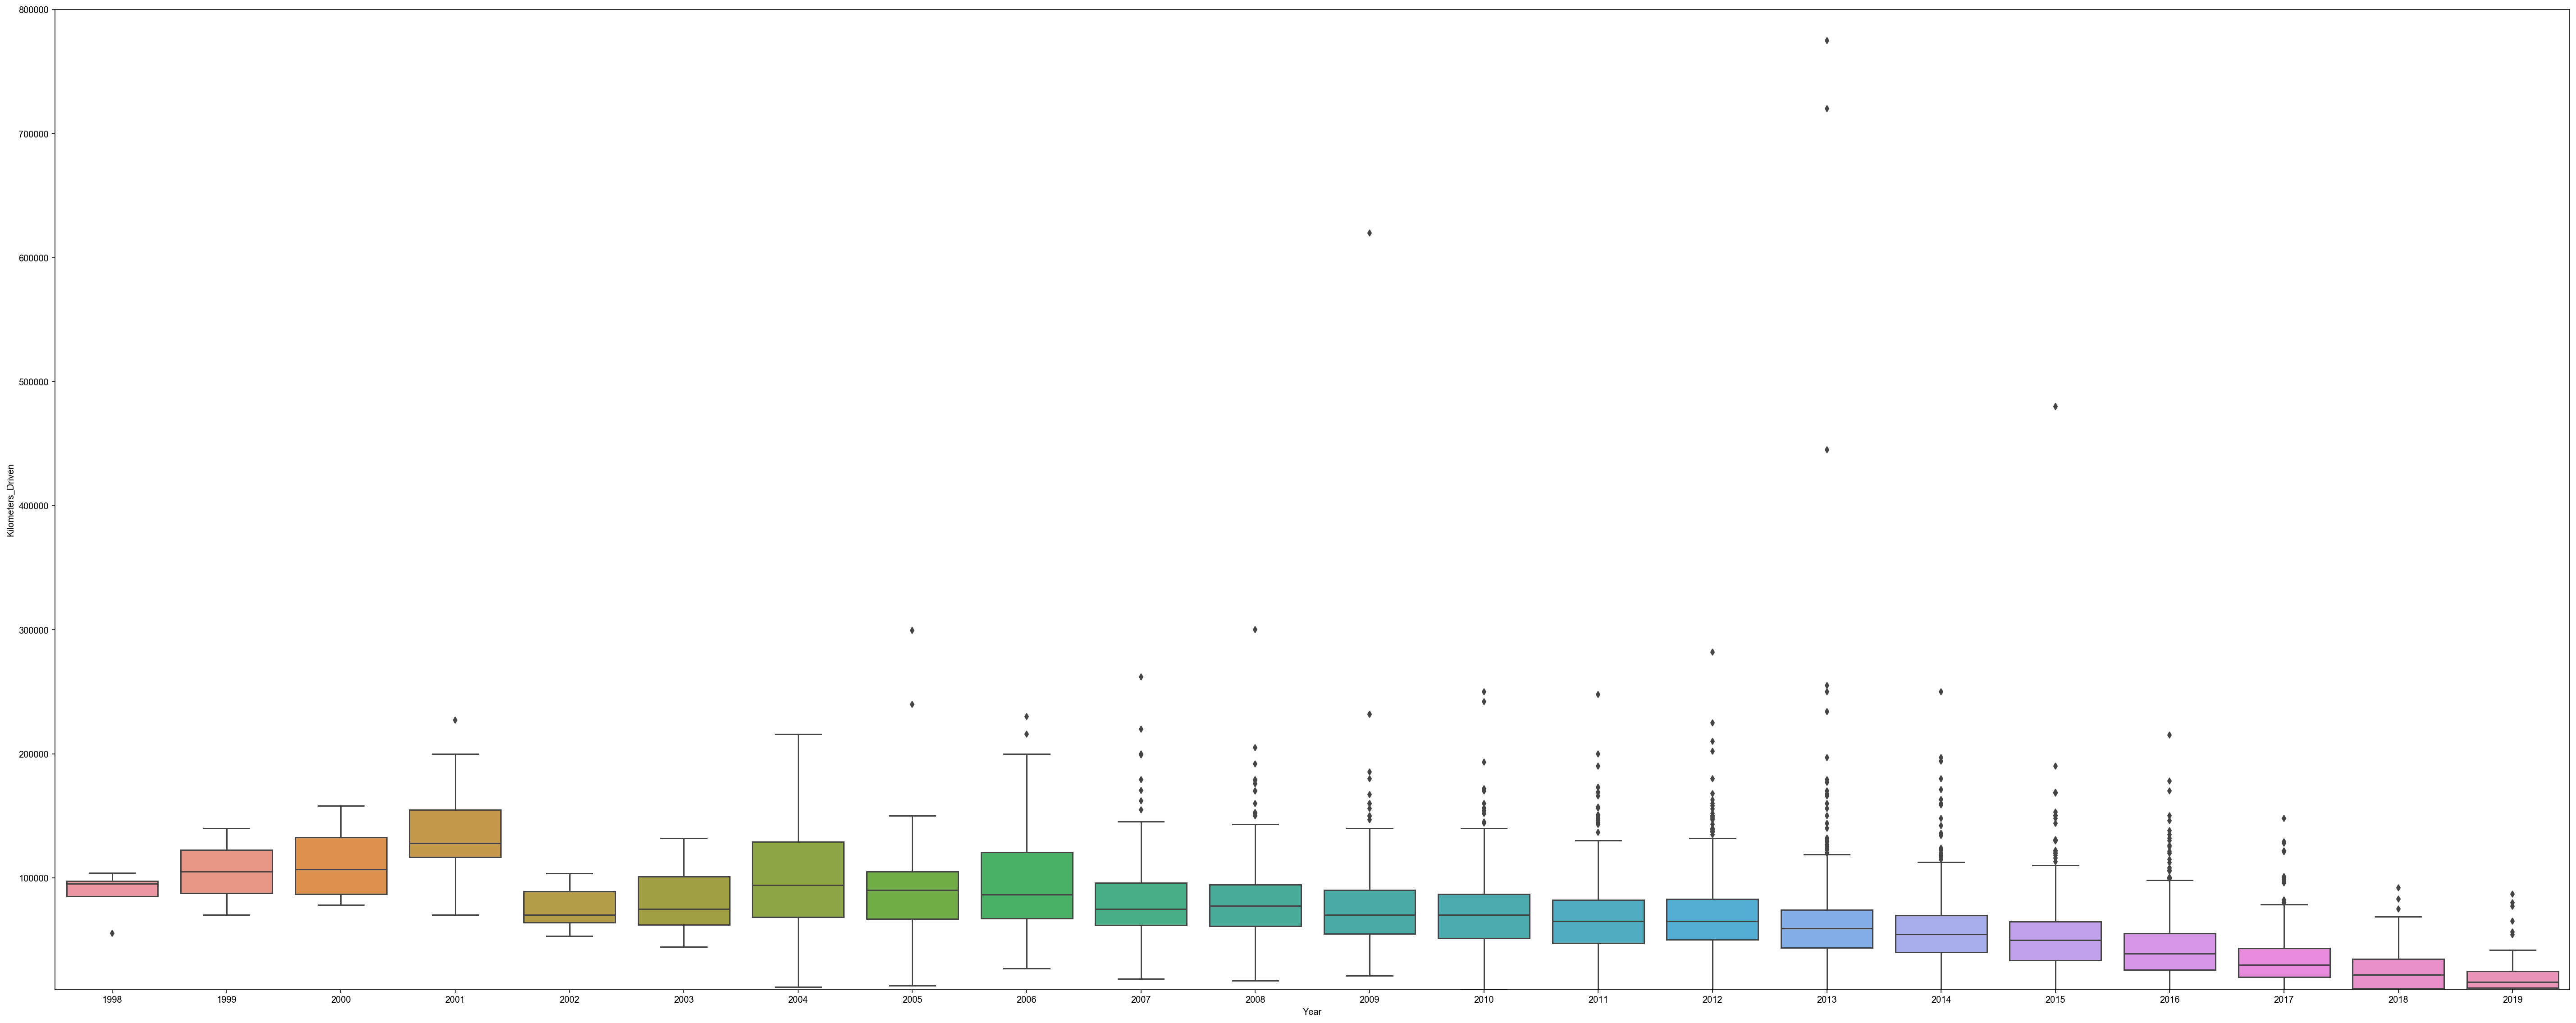

In [60]:
plt.figure(figsize=(50,20))
plt.axis([0, 5, 10000, 800000])
sns.boxplot(x='Year', y='Kilometers_Driven', data=car_td)
plt.show()

In [61]:
# Kilometers_Driven > 300000 이상치 제거
car_td_3 = car_td.drop(car_td[car_td['Kilometers_Driven'] > 300000].index)
car_td_3.reset_index(drop=True, inplace=True)
# 성능 하락 
x = car_td_3.drop(['Car_name','Price','Eng'], axis=1)
y = car_td_3['Price']

get_results(x, y)

explained_variance_score: 0.6027851644780878
mean_squared_errors: 37.36087788743932
r2_score: 0.6021625059110838


In [62]:
# Kilometers_Driven > 800000 이상치 제거
car_td_8 = car_td.drop(car_td[car_td['Kilometers_Driven'] > 800000].index)
car_td_8.reset_index(drop=True, inplace=True)
# MSE가 더 낮아진다
x = car_td_8.drop(['Car_name','Price','Eng'], axis=1)
y = car_td_8['Price']

get_results(x, y)

explained_variance_score: 0.747702110629644
mean_squared_errors: 24.81061500155918
r2_score: 0.7476273076704594


### 4. Scaler

### 4-1 MinMaxScaler

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
mm = MinMaxScaler()

In [65]:
# 0.00000000009차이
x = mm.fit_transform(car_td_8.drop(['Car_name','Price','Eng'], axis=1))
y = car_td_8['Price']

get_results(x, y)

explained_variance_score: 0.7477021106365351
mean_squared_errors: 24.810615001062594
r2_score: 0.7476273076773583


### 4-2 StandardScaler

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss = StandardScaler()

In [109]:
car_td_8.head(1)

,Year,Kilometers_Driven,Seats,Price,Car_name,Mile,Eng,Pow,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner
0,2010,72000,5,1.75,Wagon R LXI CNG,43.624,998.0,58.16,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [111]:
x = ss.fit_transform(car_td_8.drop(['Car_name','Price','Seats'], axis=1))
y = car_td_8['Price']

get_results(x, y)

explained_variance_score: 5.850875339774575e-14
mean_squared_errors: 3.923001072134668e+25
r2_score: -0.0008312551952873726


### 4-3 RobustScaler

In [69]:
from sklearn.preprocessing import RobustScaler

In [70]:
rs = RobustScaler()

In [71]:
x = rs.fit_transform(car_td_8.drop(['Car_name','Price','Eng'], axis=1))
y = car_td_8['Price']

get_results(x, y)

explained_variance_score: 0.7477021106365351
mean_squared_errors: 24.810615001062658
r2_score: 0.747627307677358


In [72]:
### 5. PCA

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components=1)

x = ss.fit_transform(car_td_8.drop(['Car_name','Price','Eng'], axis=1))
y = car_td_8['Price']

principals = pca.fit_transform(x)
principals_df = pd.DataFrame(data=principals, columns=['principal_component'])

get_results(principals, y)

explained_variance_score: 0.31526044392409147
mean_squared_errors: 49.18583628540189
r2_score: 0.31500630536064667


<AxesSubplot:xlabel='principal_component', ylabel='Price'>

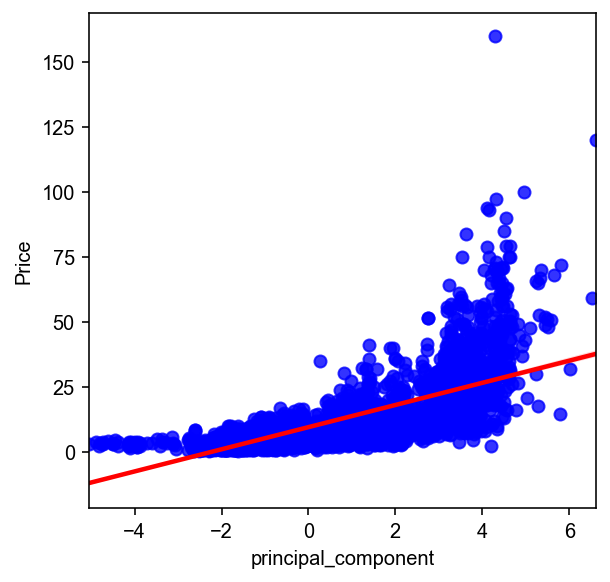

In [75]:
# 주성분 분석 결과 데이터 프레임으로 정리
principals_df['Price'] = y

# 위 사항을 그래프로 표현
plt.figure(figsize=(10,10))

plt.subplot(221)
sns.regplot(x='principal_component', y='Price', data=principals_df, scatter_kws={'color':'blue'},
           line_kws={'color':'red'})

In [76]:
### 6. Cross_Validation

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [78]:
skf = StratifiedKFold(n_splits=5)
kf = KFold(n_splits=5)

In [79]:
# x = ss.fit_transform(car_td_8.drop(['Car_name','Price','Eng'], axis=1))
# y = car_td_8['Price']

In [80]:
x = car_td_8.drop(['Car_name','Price','Eng'], axis=1)
y = car_td_8['Price']

In [82]:
reg = LinearRegression()

In [83]:
cross_validate(reg, x, y, cv=kf)

{'fit_time': array([0.01926708, 0.01482296, 0.01293588, 0.02207685, 0.01637983]),
 'score_time': array([0.00396872, 0.00339079, 0.00321698, 0.0058701 , 0.00437975]),
 'test_score': array([0.77968648, 0.76088948, 0.78214742, 0.71446684, 0.7900753 ])}

In [84]:
score = cross_val_score(reg, x, y, cv=kf)
score.mean()

0.7654531058325824

In [85]:
### 7. 검증

In [86]:
### 8. 분석

In [87]:
x = car_td_8.drop(['Car_name','Price','Eng'], axis=1)
y = car_td_8['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(x_train, y_train)

predicted = reg.predict(x_test)

actual = y_test

In [88]:
act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

In [89]:
act_df.reset_index(inplace=True)

In [90]:
act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

In [91]:
act_pred_df['Gap'] = act_pred_df['predicted'] - act_pred_df['actual']

In [92]:
act_pred_df.sort_values(by='Gap', ascending=True)

,index,actual,predicted,Gap
677,5532,85.00,35.116423,-49.883577
1764,1885,79.00,38.611723,-40.388277
291,2095,83.96,48.428553,-35.531447
589,1194,69.50,37.022320,-32.477680
76,1830,64.87,38.406847,-26.463153
...,...,...,...,...
1771,4419,16.58,40.772090,24.192090
313,3838,14.00,38.545725,24.545725
556,2100,32.00,76.317563,44.317563
1784,70,14.50,69.212084,54.712084


In [93]:
car_td_8.loc[5532]

Year                                       2015
Kilometers_Driven                         97003
Seats                                         5
Price                                      85.0
Car_name                  X6 xDrive 40d M Sport
Mile                                      15.87
Eng                                      2993.0
Pow                                      308.43
Location_Ahmedabad                            1
Location_Bangalore                            0
Location_Chennai                              0
Location_Coimbatore                           0
Location_Delhi                                0
Location_Hyderabad                            0
Location_Jaipur                               0
Location_Kochi                                0
Location_Kolkata                              0
Location_Mumbai                               0
Location_Pune                                 0
Fuel_Type_CNG                                 0
Fuel_Type_Diesel                        

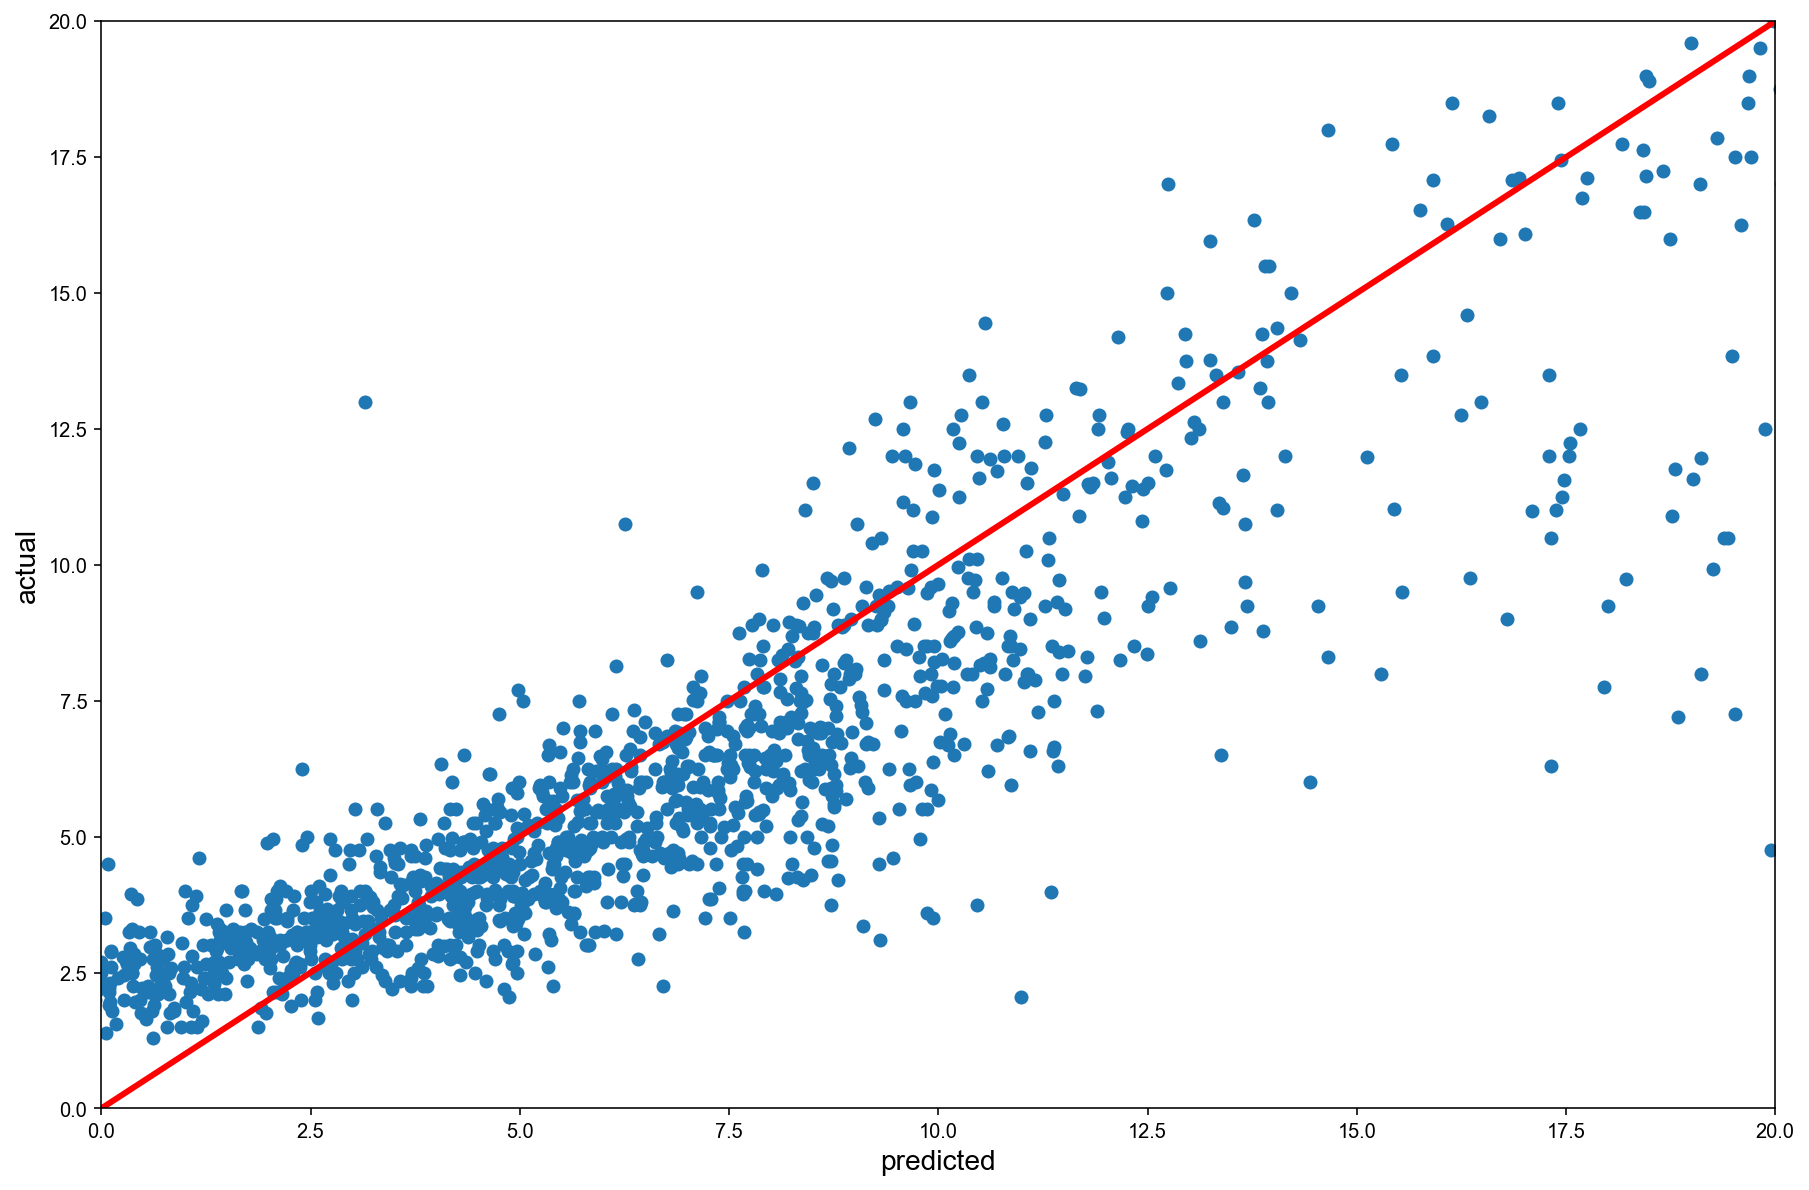

In [94]:
plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 20, 0, 20])  
line = plt.plot([0,20], [0,20])
plt.setp(line, color='r', linewidth=3.0)

plt.show()

In [95]:
# Fuel Type 제거

In [96]:
car_td_8.columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_name', 'Mile',
       'Eng', 'Pow', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Brand_Ambassador',
       'Brand_Audi', 'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_Isuzu', 'Brand_Jaguar',
       'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Smart', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen',
   

In [97]:
x = car_td_8.drop(['Car_name','Price','Eng','Fuel_Type_CNG', 'Fuel_Type_LPG', 'Brand_Smart', 'Brand_Bentley', 'Brand_Lamborghini', 'Brand_Ambassador', 'Brand_Isuzu', 'Brand_Force', 'Brand_Datsun', 'Brand_Jeep', 'Brand_Porsche', 'Brand_Volvo', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Fiat', 'Brand_Jaguar', 'Brand_Land', 'Brand_Nissan'], axis=1)
y = car_td_8['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(x_train, y_train)

predicted = reg.predict(x_test)

actual = y_test

In [98]:
act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

In [99]:
act_df.reset_index(drop=True, inplace=True)

In [100]:
act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['actual', 'predicted']

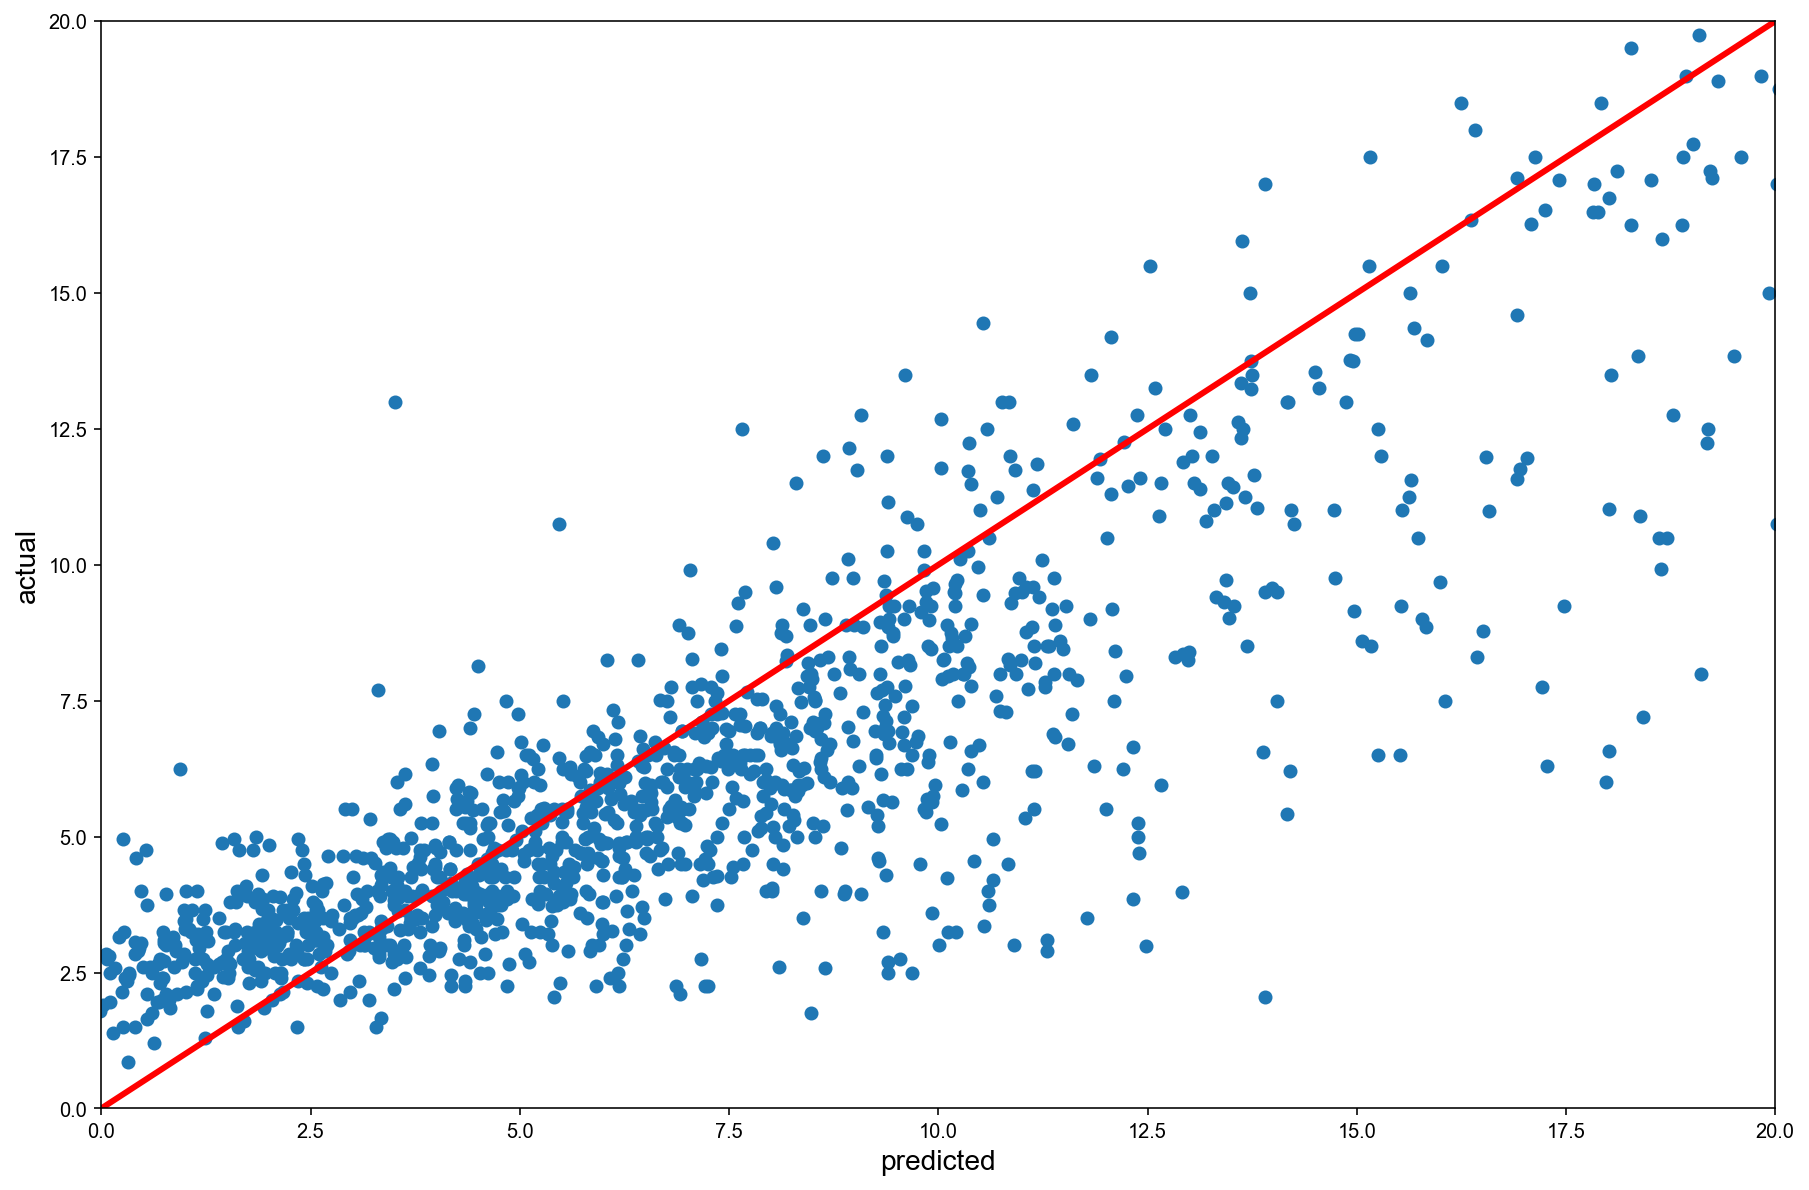

In [101]:
plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 20, 0, 20])  
line = plt.plot([0,20], [0,20])
plt.setp(line, color='r', linewidth=3.0)

plt.show()

In [102]:
x = ss.fit_transform(car_td_8.drop(['Car_name','Price','Eng'], axis=1))
y = car_td_8['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(x_train, y_train)

predicted = reg.predict(x_test)

actual = y_test

In [103]:
act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

In [104]:
act_df.reset_index(inplace=True, drop=True)

In [105]:
act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['actual', 'predicted']

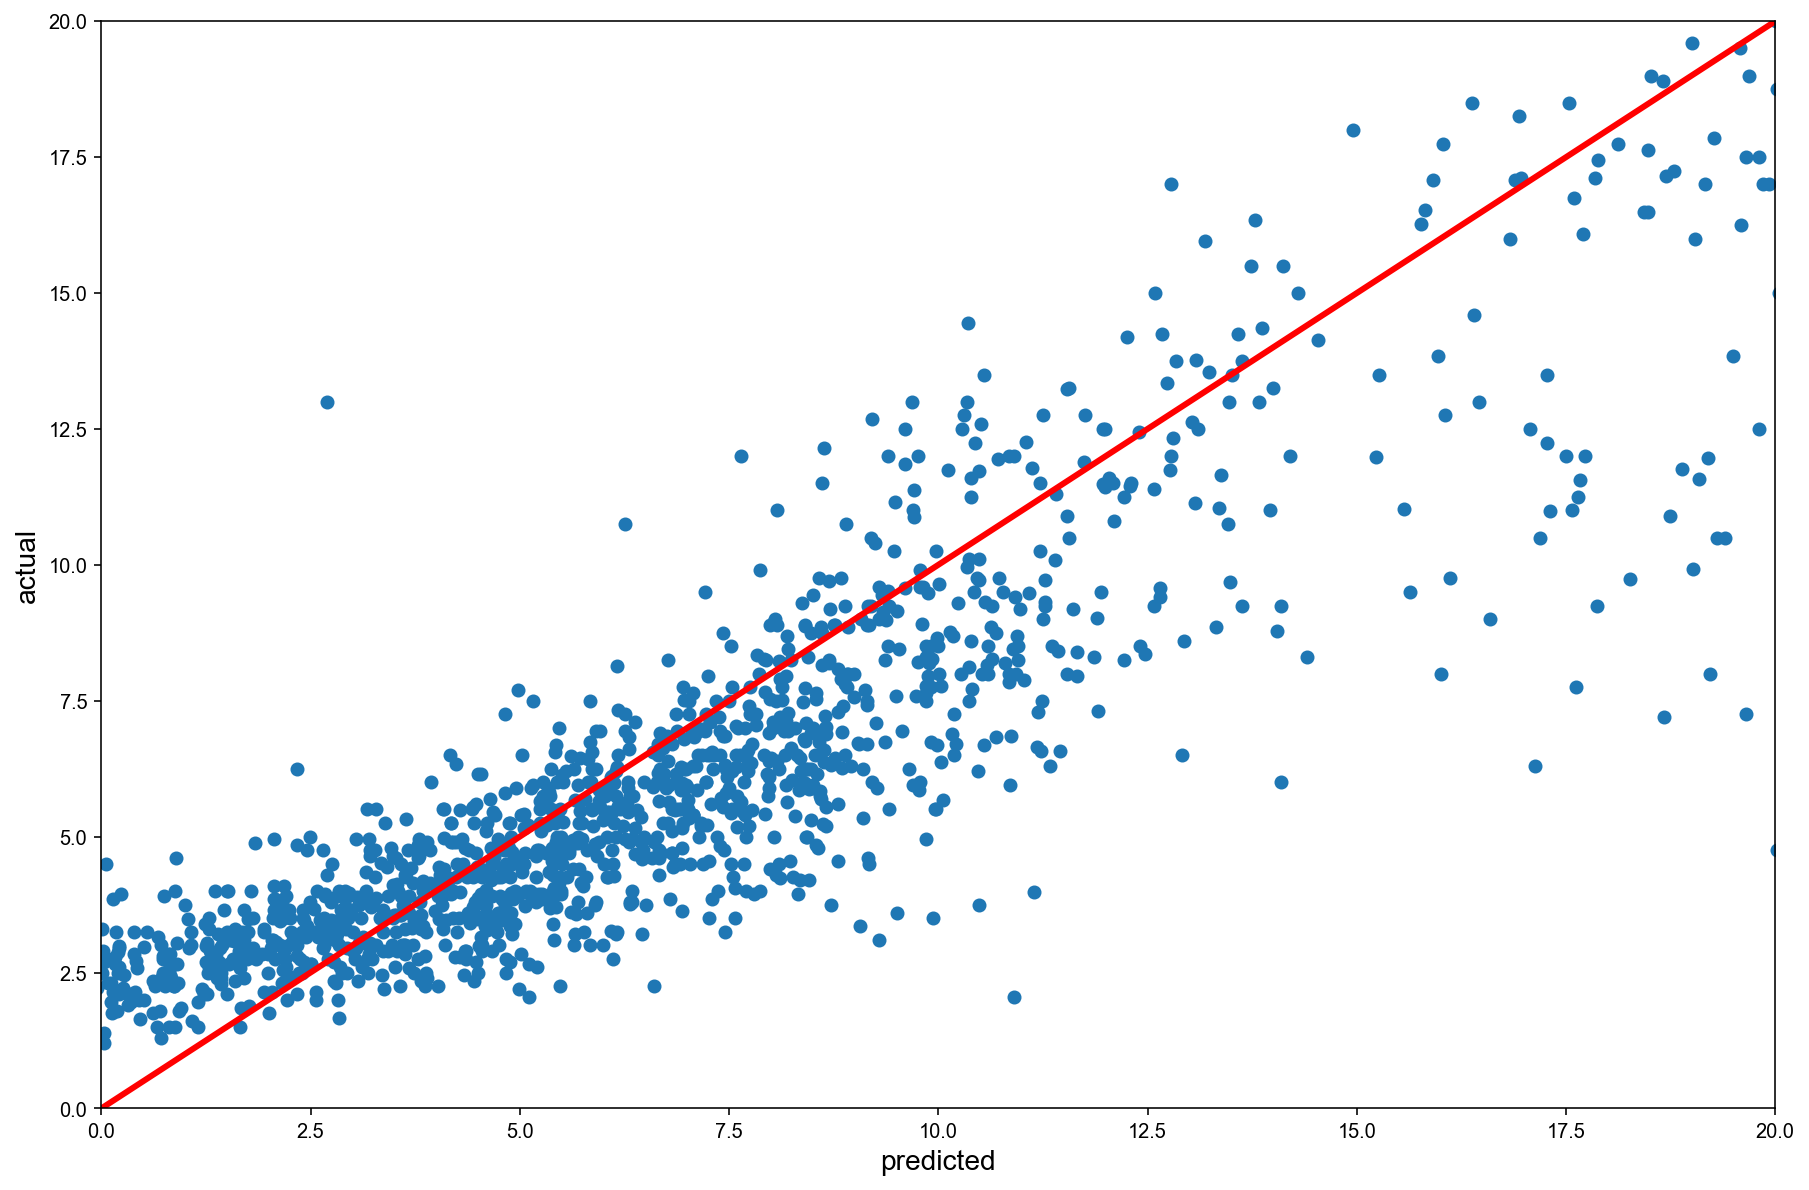

In [106]:
plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 20, 0, 20])  
line = plt.plot([0,20], [0,20])
plt.setp(line, color='r', linewidth=3.0)

plt.show()